### Exploratory Data Analysis Project on Industrial Facility Combustion Energy Use in the US in 2014

**Purpose**: This project aims to apply EDA (Exploratory Data Analysis) techniques to derive actionable insights from real-world energy use dataset.

**Source**: The *[Industrial Facility Combustion Energy Use](https://data.nrel.gov/system/files/50/IndustrialCombEnergy_2014%20%281%29.csv)* dataset was obtained from [NREL Data Catalog](https://data.nrel.gov/submissions)

**Author**: Bello Oluwatobi

**Date**: September 10, 2025

#### Step 1: Importing the required libraries and reading the data

In [133]:
# importing the required libraries
import pandas as pd # for data manipulation and analysis with DataFrames
import numpy as np  # for numerical operations and array manipulation
import matplotlib.pyplot as plt  # for data plotting and visualization
import seaborn as sns  # for high-level statistical data visualization

# increase the maximum number of columns to be displayed per output
pd.set_option('display.max_columns', 30)

In [134]:
# importing the dataset from the file system, accounting for relative and absolute paths and specifying file encoding
try:
    industrial_combustion_df = pd.read_csv("data_source/IndustrialCombEnergy_2014_utf-8_version.csv", encoding="utf-8")
except Exception as e:
    industrial_combustion_df = pd.read_csv("../data_source/IndustrialCombEnergy_2014_utf-8_version.csv", encoding="utf-8")


#### Step 2: Understanding the data 

In [135]:
# checking the no. of rows and columns of the dataset
industrial_combustion_df.shape

(20117, 23)

In [136]:
# examining the data with the first few rows
industrial_combustion_df.head()

,FACILITY_ID,FACILITY_NAME,FUEL_TYPE,FUEL_TYPE_BLEND,FUEL_TYPE_OTHER,OTHER_OR_BLEND_FUEL_TYPE,REPORTING_YEAR,UNIT_NAME,UNIT_TYPE,COUNTY,COUNTY_FIPS,LATITUDE,LONGITUDE,STATE,ZIP,PRIMARY_NAICS_CODE,PRIMARY_NAICS_TITLE,COGENERATION_UNIT_EMISS_IND,CENSUS_PLACE_NAME,MECS_Region,MMBtu_TOTAL,GWht_TOTAL,GROUPING
0,1003826,ATLANTIC WASTE DISPOSAL INC - SUSSEX COUNTY LAND,Propane Gas,NaN,NaN,NaN,2014,PROPHTR003,CH (Comfort heater),SUSSEX,51183,37.061279,-77.177106,VA,23890,562212,Solid Waste Landfill,N,NaN,South,1095.021152,0.320921,Administrative and Support and Waste Managemen...
1,1003826,ATLANTIC WASTE DISPOSAL INC - SUSSEX COUNTY LAND,Propane Gas,NaN,NaN,NaN,2014,PROPHTR001,CH (Comfort heater),SUSSEX,51183,37.061279,-77.177106,VA,23890,562212,Solid Waste Landfill,N,NaN,South,1488.773186,0.436319,Administrative and Support and Waste Managemen...
2,1003826,ATLANTIC WASTE DISPOSAL INC - SUSSEX COUNTY LAND,Propane Gas,NaN,NaN,NaN,2014,PROPHTR002,CH (Comfort heater),SUSSEX,51183,37.061279,-77.177106,VA,23890,562212,Solid Waste Landfill,N,NaN,South,1488.773186,0.436319,Administrative and Support and Waste Managemen...
3,1003826,ATLANTIC WASTE DISPOSAL INC - SUSSEX COUNTY LAND,Propane Gas,NaN,NaN,NaN,2014,WTRHTR001,"HWH (Heater, hot water)",SUSSEX,51183,37.061279,-77.177106,VA,23890,562212,Solid Waste Landfill,N,NaN,South,2803.449398,0.821615,Administrative and Support and Waste Managemen...
4,1005928,LARIMER COUNTY LANDFILL,Liquefied petroleum gases (LPG),NaN,NaN,NaN,2014,GP-1,OCS (Other combustion source),LARIMER COUNTY,8069,40.498030,-105.120320,CO,80526,562212,Solid Waste Landfill,N,NaN,West,847.512559,0.248383,Administrative and Support and Waste Managemen...


In [137]:
# checking the last rows of the dataset
industrial_combustion_df.tail()

,FACILITY_ID,FACILITY_NAME,FUEL_TYPE,FUEL_TYPE_BLEND,FUEL_TYPE_OTHER,OTHER_OR_BLEND_FUEL_TYPE,REPORTING_YEAR,UNIT_NAME,UNIT_TYPE,COUNTY,COUNTY_FIPS,LATITUDE,LONGITUDE,STATE,ZIP,PRIMARY_NAICS_CODE,PRIMARY_NAICS_TITLE,COGENERATION_UNIT_EMISS_IND,CENSUS_PLACE_NAME,MECS_Region,MMBtu_TOTAL,GWht_TOTAL,GROUPING
20112,1006685,MAYO MEDICAL CENTER - ROCHESTER,Natural Gas (Weighted U.S. Average),NaN,NaN,NaN,2014,GP-1,OCS (Other combustion source),OLMSTED,27109,44.022152,-92.466615,MN,55905,621111,Offices of Physicians (except Mental Health Sp...,Y,NaN,Midwest,1.307688e+06,383.247812,Health Care and Social Assistance
20113,1006685,MAYO MEDICAL CENTER - ROCHESTER,Distillate Fuel Oil No. 2,NaN,NaN,NaN,2014,GP-1,OCS (Other combustion source),OLMSTED,27109,44.022152,-92.466615,MN,55905,621111,Offices of Physicians (except Mental Health Sp...,Y,NaN,Midwest,2.778529e+03,0.814312,Health Care and Social Assistance
20114,1006685,MAYO MEDICAL CENTER - ROCHESTER,Residual Fuel Oil No. 6,NaN,NaN,NaN,2014,GP-1,OCS (Other combustion source),OLMSTED,27109,44.022152,-92.466615,MN,55905,621111,Offices of Physicians (except Mental Health Sp...,Y,NaN,Midwest,3.045007e+04,8.924090,Health Care and Social Assistance
20115,1000458,"Malaga Power, LLC",Natural Gas (Weighted U.S. Average),NaN,NaN,NaN,2014,GT-2,Electricity Generator,Fresno,6019,36.689400,-119.739900,CA,93725,926130,Regulation and Administration of Communication...,N,NaN,West,1.254958e+06,367.794274,Public Adminsitration
20116,1000458,"Malaga Power, LLC",Natural Gas (Weighted U.S. Average),NaN,NaN,NaN,2014,GT-1,Electricity Generator,Fresno,6019,36.689400,-119.739900,CA,93725,926130,Regulation and Administration of Communication...,N,NaN,West,1.340090e+06,392.744218,Public Adminsitration


In [138]:
# listing all the dataset columns
industrial_combustion_df.columns

Index(['FACILITY_ID', 'FACILITY_NAME', 'FUEL_TYPE', 'FUEL_TYPE_BLEND',
       'FUEL_TYPE_OTHER', 'OTHER_OR_BLEND_FUEL_TYPE', 'REPORTING_YEAR',
       'UNIT_NAME', 'UNIT_TYPE', 'COUNTY', 'COUNTY_FIPS', 'LATITUDE',
       'LONGITUDE', 'STATE', 'ZIP', 'PRIMARY_NAICS_CODE',
       'PRIMARY_NAICS_TITLE', 'COGENERATION_UNIT_EMISS_IND',
       'CENSUS_PLACE_NAME', 'MECS_Region', 'MMBtu_TOTAL', 'GWht_TOTAL',
       'GROUPING'],
      dtype='object')

In [139]:
# confirming the data types for each column
industrial_combustion_df.dtypes

FACILITY_ID                      int64
FACILITY_NAME                   object
FUEL_TYPE                       object
FUEL_TYPE_BLEND                float64
FUEL_TYPE_OTHER                float64
OTHER_OR_BLEND_FUEL_TYPE        object
REPORTING_YEAR                   int64
UNIT_NAME                       object
UNIT_TYPE                       object
COUNTY                          object
COUNTY_FIPS                      int64
LATITUDE                       float64
LONGITUDE                      float64
STATE                           object
ZIP                              int64
PRIMARY_NAICS_CODE               int64
PRIMARY_NAICS_TITLE             object
COGENERATION_UNIT_EMISS_IND     object
CENSUS_PLACE_NAME               object
MECS_Region                     object
MMBtu_TOTAL                    float64
GWht_TOTAL                     float64
GROUPING                        object
dtype: object

In [140]:
# checking summary statistics of the numerical columns
industrial_combustion_df.describe()

,FACILITY_ID,FUEL_TYPE_BLEND,FUEL_TYPE_OTHER,REPORTING_YEAR,COUNTY_FIPS,LATITUDE,LONGITUDE,ZIP,PRIMARY_NAICS_CODE,MMBtu_TOTAL,GWht_TOTAL
count,2.011700e+04,0.0,0.0,20117.0,20117.000000,20057.000000,20057.000000,20117.000000,20117.000000,2.011700e+04,20117.000000
mean,1.004850e+06,NaN,NaN,2014.0,29268.592285,37.591472,-92.293891,52622.907392,357464.143013,5.254344e+05,153.990589
std,2.901460e+03,NaN,NaN,0.0,16914.006712,6.685860,16.742720,28178.049404,147040.507435,1.588700e+06,465.604893
min,1.000002e+06,NaN,NaN,2014.0,0.000000,13.463639,-166.551311,0.000000,111419.000000,1.000000e+00,0.000293
25%,1.002389e+06,NaN,NaN,2014.0,17099.000000,32.504129,-97.108580,29812.000000,221112.000000,2.014795e+03,0.590482
50%,1.004809e+06,NaN,NaN,2014.0,27137.000000,38.596226,-90.031099,54302.000000,324110.000000,4.656615e+04,13.647278
75%,1.007002e+06,NaN,NaN,2014.0,45041.000000,41.670300,-82.250816,77520.000000,486210.000000,4.679363e+05,137.139461
max,1.011787e+06,NaN,NaN,2014.0,78030.000000,71.292212,144.807727,99801.000000,928110.000000,5.309989e+07,15562.141560


#### Step 3: Cleaning/Preparing the data

In [141]:
# dropping the columns not required for the analysis and extract the new DataFrame
refined_df = industrial_combustion_df.drop(['FACILITY_ID', 'FUEL_TYPE_BLEND', 'FUEL_TYPE_OTHER', 'OTHER_OR_BLEND_FUEL_TYPE', 'CENSUS_PLACE_NAME', \
                                            'REPORTING_YEAR','COUNTY','COUNTY_FIPS','LATITUDE', 'LONGITUDE','ZIP', 'PRIMARY_NAICS_CODE'], \
                                                  axis=1)

In [142]:
# converting the Y and N values to "Yes" and "No" respectively in the COGENERATION_UNIT_EMISS_IND column
refined_df.replace({'COGENERATION_UNIT_EMISS_IND': {'Y': 'Yes', 'N': 'No'}}, inplace=True)

In [143]:
# checking the new DataFrame
refined_df.head()

,FACILITY_NAME,FUEL_TYPE,UNIT_NAME,UNIT_TYPE,STATE,PRIMARY_NAICS_TITLE,COGENERATION_UNIT_EMISS_IND,MECS_Region,MMBtu_TOTAL,GWht_TOTAL,GROUPING
0,ATLANTIC WASTE DISPOSAL INC - SUSSEX COUNTY LAND,Propane Gas,PROPHTR003,CH (Comfort heater),VA,Solid Waste Landfill,No,South,1095.021152,0.320921,Administrative and Support and Waste Managemen...
1,ATLANTIC WASTE DISPOSAL INC - SUSSEX COUNTY LAND,Propane Gas,PROPHTR001,CH (Comfort heater),VA,Solid Waste Landfill,No,South,1488.773186,0.436319,Administrative and Support and Waste Managemen...
2,ATLANTIC WASTE DISPOSAL INC - SUSSEX COUNTY LAND,Propane Gas,PROPHTR002,CH (Comfort heater),VA,Solid Waste Landfill,No,South,1488.773186,0.436319,Administrative and Support and Waste Managemen...
3,ATLANTIC WASTE DISPOSAL INC - SUSSEX COUNTY LAND,Propane Gas,WTRHTR001,"HWH (Heater, hot water)",VA,Solid Waste Landfill,No,South,2803.449398,0.821615,Administrative and Support and Waste Managemen...
4,LARIMER COUNTY LANDFILL,Liquefied petroleum gases (LPG),GP-1,OCS (Other combustion source),CO,Solid Waste Landfill,No,West,847.512559,0.248383,Administrative and Support and Waste Managemen...


In [144]:
# inspecting the datatypes of the refined dataset
refined_df.dtypes

FACILITY_NAME                   object
FUEL_TYPE                       object
UNIT_NAME                       object
UNIT_TYPE                       object
STATE                           object
PRIMARY_NAICS_TITLE             object
COGENERATION_UNIT_EMISS_IND     object
MECS_Region                     object
MMBtu_TOTAL                    float64
GWht_TOTAL                     float64
GROUPING                        object
dtype: object

In [145]:
# checking the summary statistics of the numerical columns of the refined dataset
refined_df.describe()

,MMBtu_TOTAL,GWht_TOTAL
count,2.011700e+04,20117.000000
mean,5.254344e+05,153.990589
std,1.588700e+06,465.604893
min,1.000000e+00,0.000293
25%,2.014795e+03,0.590482
50%,4.656615e+04,13.647278
75%,4.679363e+05,137.139461
max,5.309989e+07,15562.141560


In [146]:
# searching for missing data
refined_df.isna().sum()

FACILITY_NAME                    0
FUEL_TYPE                        0
UNIT_NAME                        0
UNIT_TYPE                      281
STATE                            0
PRIMARY_NAICS_TITLE              0
COGENERATION_UNIT_EMISS_IND    160
MECS_Region                    923
MMBtu_TOTAL                      0
GWht_TOTAL                       0
GROUPING                         0
dtype: int64

In [147]:
# dropping the rows with missing data
refined_df = refined_df.dropna(ignore_index=True)

In [148]:
# confirming the removal of missing data
refined_df.isna().sum()

FACILITY_NAME                  0
FUEL_TYPE                      0
UNIT_NAME                      0
UNIT_TYPE                      0
STATE                          0
PRIMARY_NAICS_TITLE            0
COGENERATION_UNIT_EMISS_IND    0
MECS_Region                    0
MMBtu_TOTAL                    0
GWht_TOTAL                     0
GROUPING                       0
dtype: int64

In [149]:
# checking for duplicated rows of data
refined_df.loc[refined_df.duplicated()].sum()

FACILITY_NAME                    0
FUEL_TYPE                        0
UNIT_NAME                        0
UNIT_TYPE                        0
STATE                            0
PRIMARY_NAICS_TITLE              0
COGENERATION_UNIT_EMISS_IND      0
MECS_Region                      0
MMBtu_TOTAL                    0.0
GWht_TOTAL                     0.0
GROUPING                         0
dtype: object

In [150]:
# checking for the percentage of data left for analysis after data cleaning process
percent_rem_data = len(refined_df)/len(industrial_combustion_df)

percent_rem_data

0.9322960680021872

### Step 4: Feature Understanding 

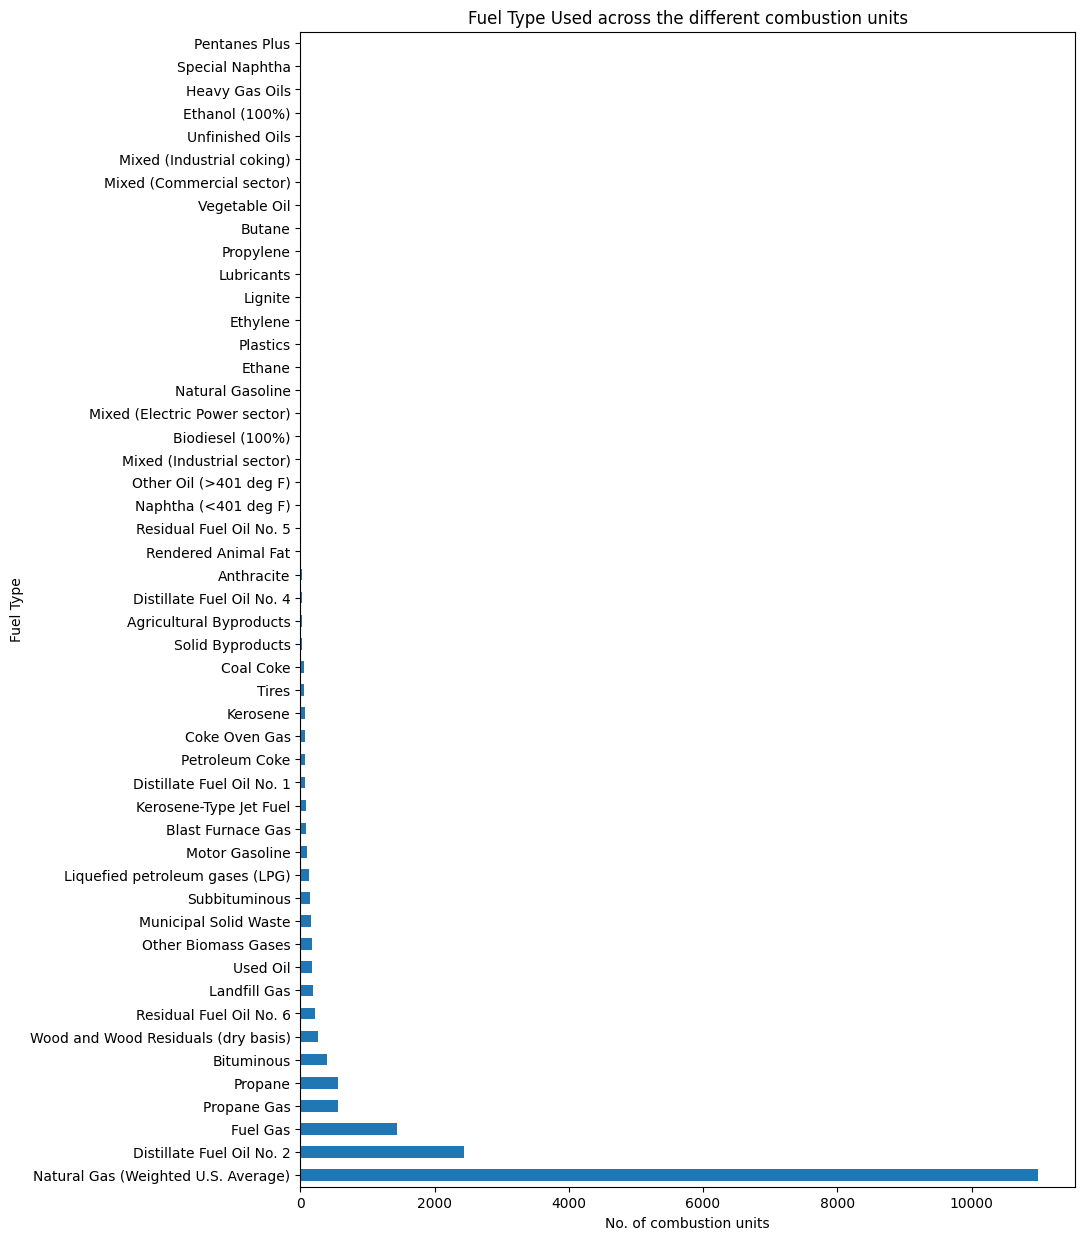

In [151]:
# visualizing the FUEL_TYPE column using a bar plot
ax = refined_df['FUEL_TYPE'].value_counts().plot(kind='barh',figsize=(10,15))

# setting the title and x and y labels
ax.set_title('Fuel Type Used across the different combustion units')
ax.set_xlabel('No. of combustion units')
ax.set_ylabel('Fuel Type')

plt.show()

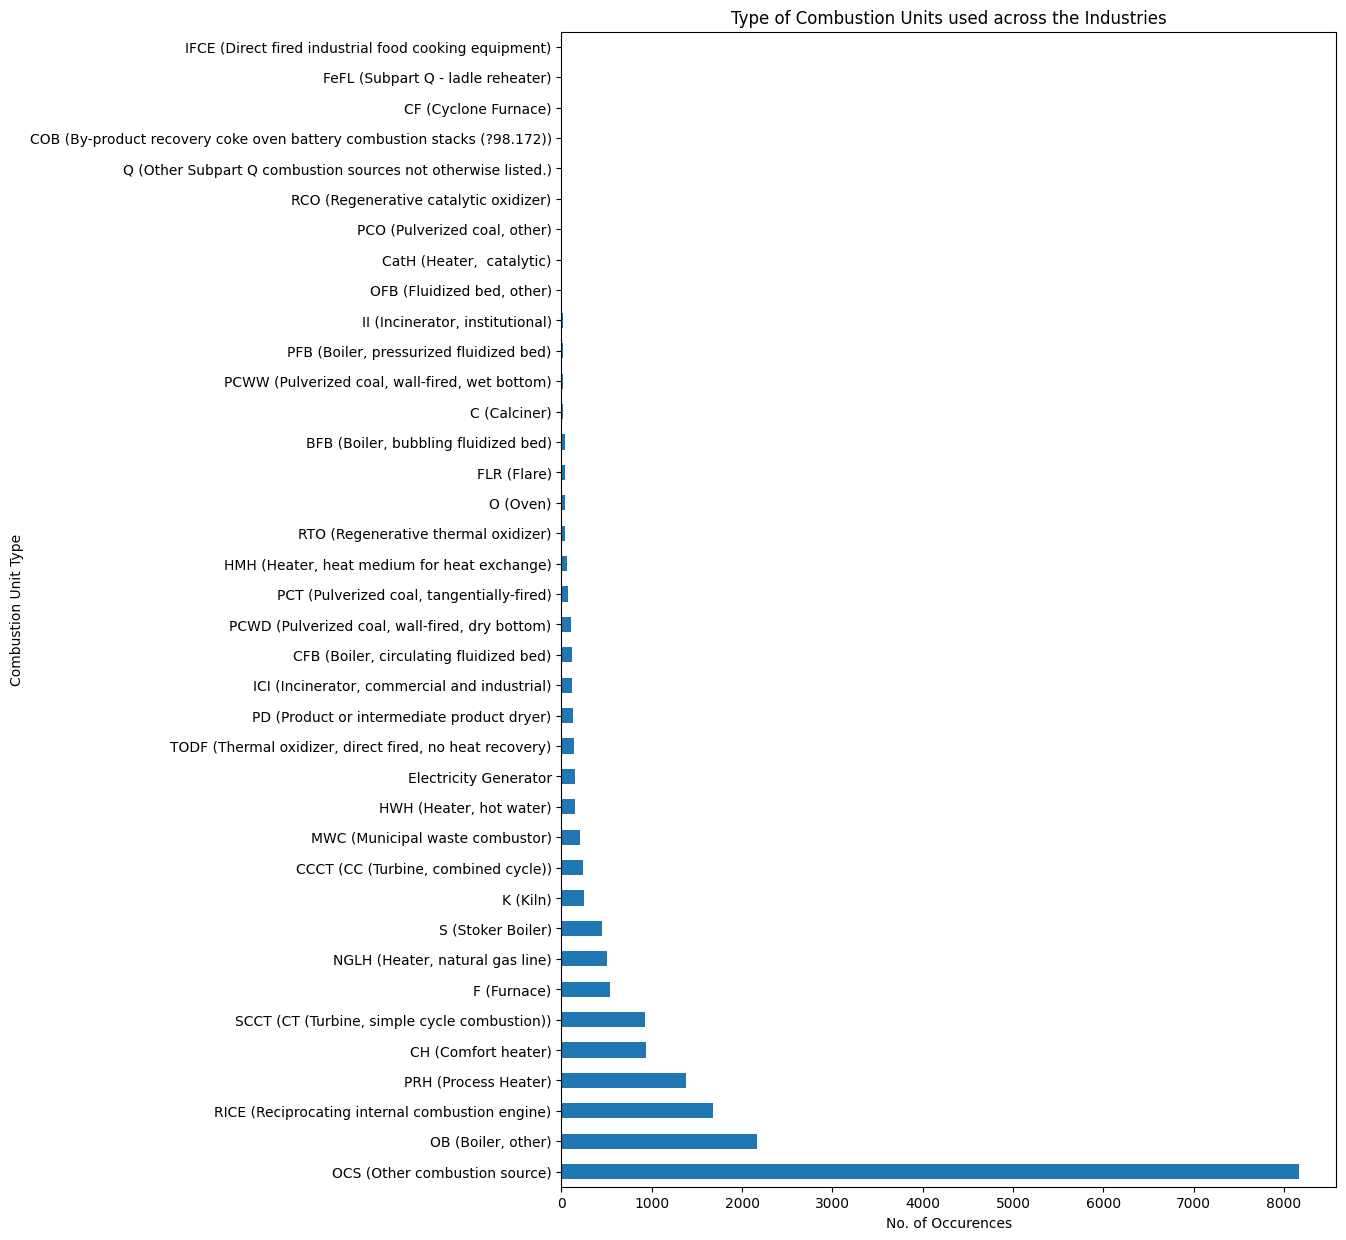

In [152]:
# visualize the UNIT_TYPE column using a bar plot
ax = refined_df['UNIT_TYPE'].value_counts().plot(kind='barh',figsize=(10,15))

# setting the title and x and y labels
ax.set_title('Type of Combustion Units used across the Industries')
ax.set_xlabel('No. of Occurences')
ax.set_ylabel('Combustion Unit Type')

plt.show()

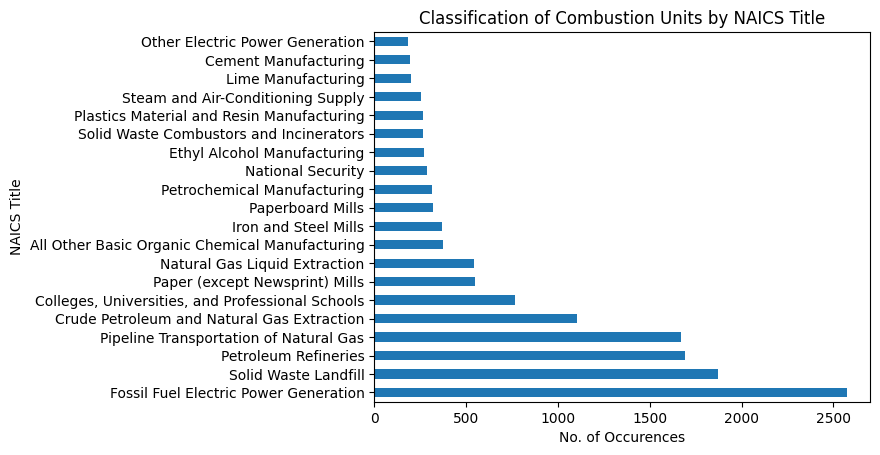

In [153]:
# visualizing the distribution of combustion units by their North American Industry Classification System (NAICS) title - first 20
ax = refined_df['PRIMARY_NAICS_TITLE'].value_counts().head(20).plot(kind='barh')

# setting the title and x and y labels
ax.set_title('Classification of Combustion Units by NAICS Title')
ax.set_xlabel('No. of Occurences')
ax.set_ylabel('NAICS Title')

plt.show()

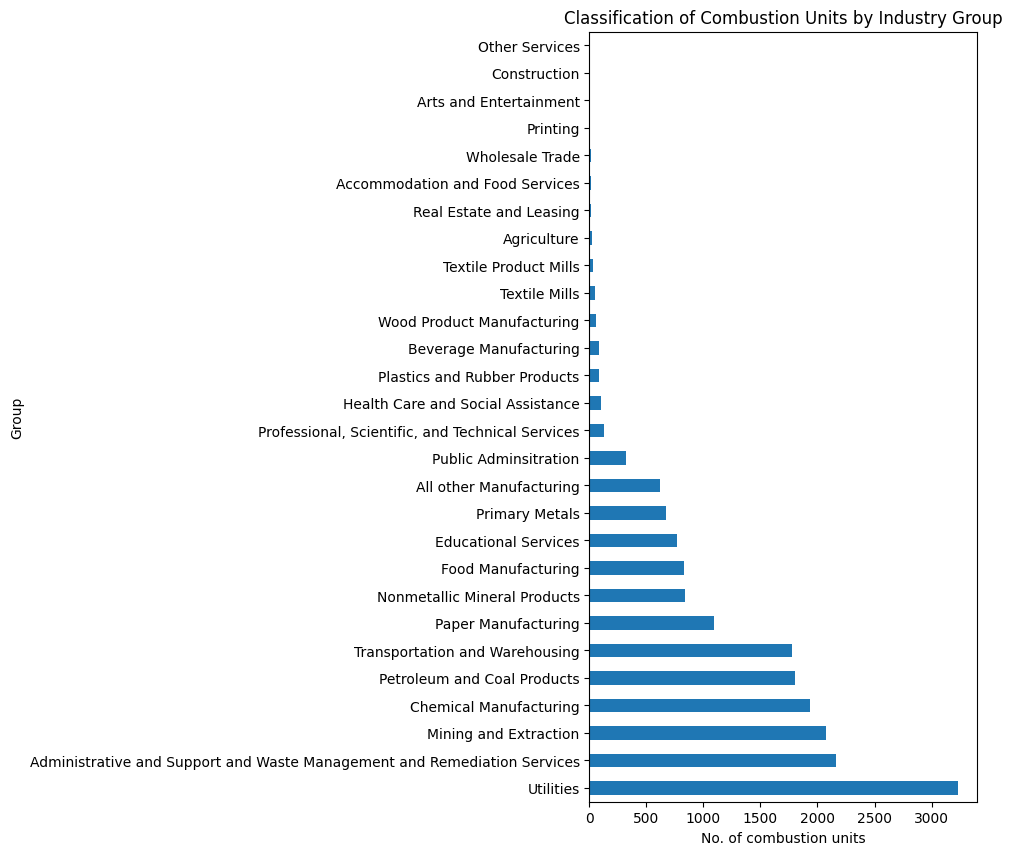

In [154]:
# visualizing the distribution of combustion units by the Industry Group using a bar plot
ax = refined_df['GROUPING'].value_counts().plot(kind='barh', figsize=(5,10))

# setting the title and x and y labels
ax.set_title('Classification of Combustion Units by Industry Group')
ax.set_xlabel('No. of combustion units')
ax.set_ylabel('Group')

plt.show()

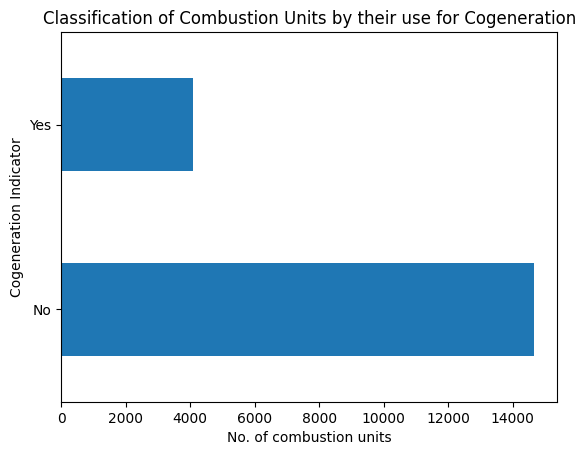

In [155]:
# visualizing the distribution of combustion units by their use for cogeneration purposes
ax = refined_df['COGENERATION_UNIT_EMISS_IND'].value_counts().plot(kind='barh')


# setting the title and x and y labels
ax.set_title('Classification of Combustion Units by their use for Cogeneration')
ax.set_xlabel('No. of combustion units')
ax.set_ylabel('Cogeneration Indicator')

plt.show()

In [156]:
# Confirming the number of US States covered in the dataset
refined_df['STATE'].unique().shape[0]


51

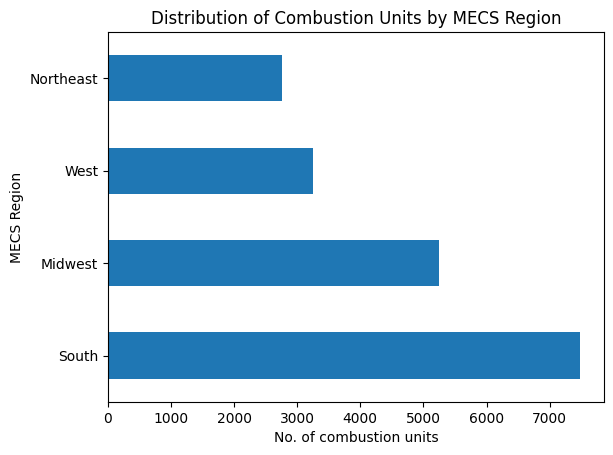

In [157]:
# plotting distribution of Manufacturing Energy Consumption Survey (MECS) regions covered in the dataset
ax = refined_df['MECS_Region'].value_counts().plot(kind='barh')

ax.set_title('Distribution of Combustion Units by MECS Region')
ax.set_xlabel('No. of combustion units')
ax.set_ylabel('MECS Region')

plt.show()

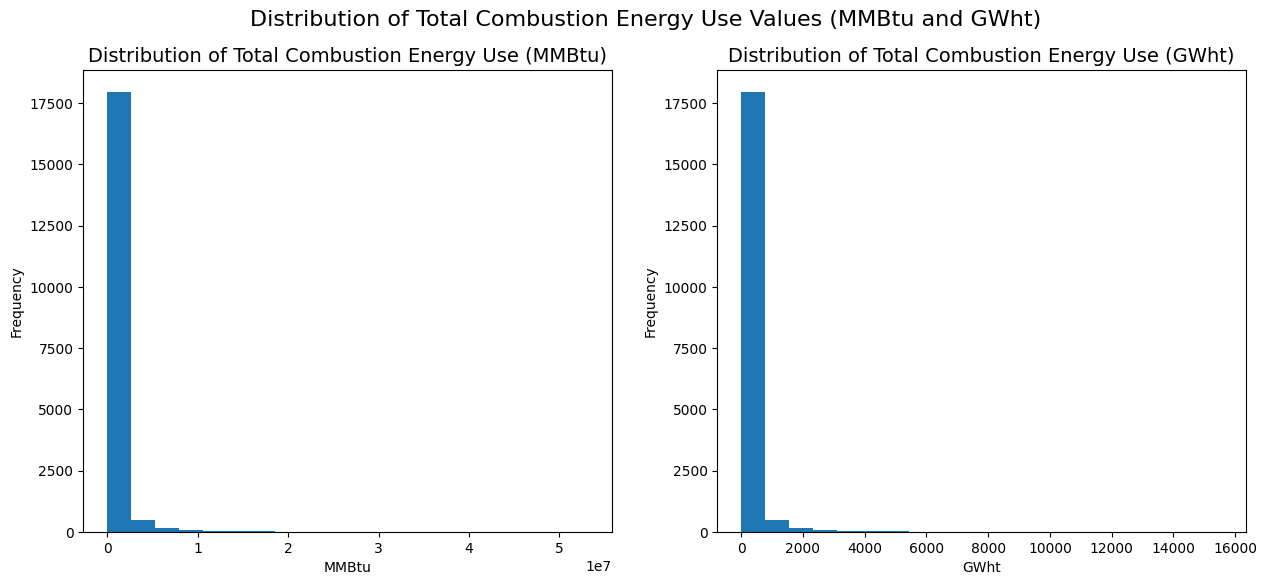

In [158]:
# visualizing the distribution of total energy use in MMBtu and GWht

# specifying the subplots parameters
no_of_subplots = 2
rows = 1
cols = 2

# specifying the spacing between subplots
plt.figure(figsize=(15 * rows, 3 * np.ceil(no_of_subplots/rows)))

# subplot 1: for the distribution of total energy use in MMBtu
plt.subplot(rows, cols, 1)
plt.hist(x=refined_df['MMBtu_TOTAL'], bins=20)
plt.title('Distribution of Total Combustion Energy Use (MMBtu)', fontsize=14)
plt.xlabel('MMBtu')
plt.ylabel('Frequency')

# subplot 2: for the distribution of total energy use in GWht 
plt.subplot(rows, cols, 2)
plt.hist(x=refined_df['GWht_TOTAL'], bins=20)
plt.title('Distribution of Total Combustion Energy Use (GWht)', fontsize=14)
plt.xlabel('GWht')
plt.ylabel('Frequency')


# adding a main title to the subplots
plt.suptitle('Distribution of Total Combustion Energy Use Values (MMBtu and GWht)', fontsize=16)

plt.show()       


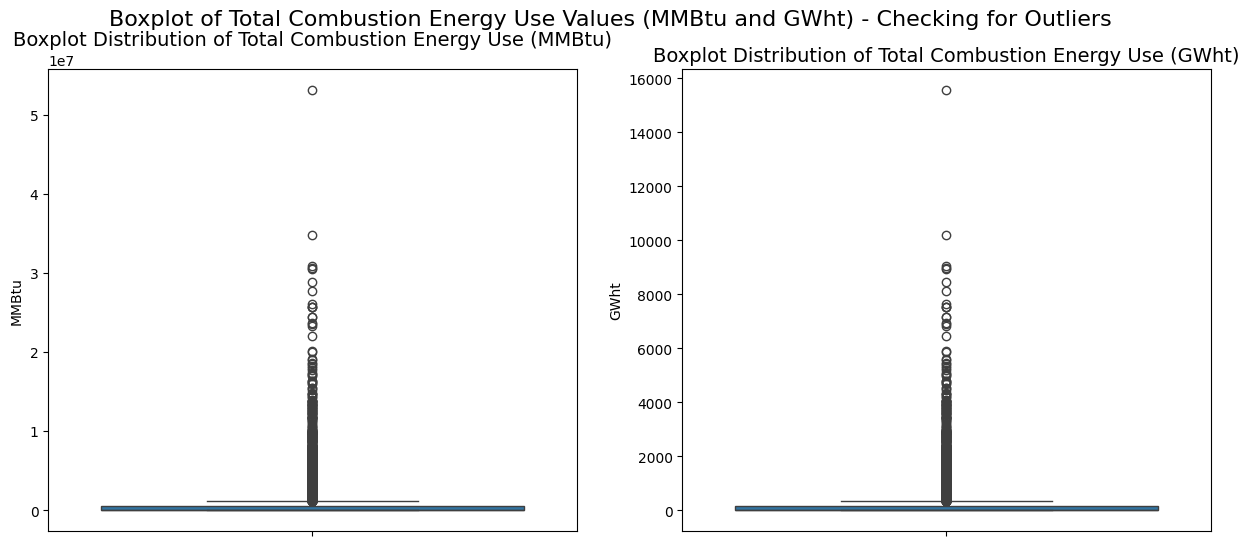

In [159]:
# visualizing the distribution of total combustion energy use in MMBtu and GWht using boxplots i.e. checking for outliers


# specifying the subplots parameters
no_of_subplots = 2
rows = 1
cols = 2

# specifying the spacing between subplots
plt.figure(figsize=(15 * rows, 3 * np.ceil(no_of_subplots/rows)))

# subplot 1: for the distribution of total energy use in MMBtu using boxplot
plt.subplot(rows, cols, 1)
sns.boxplot(y='MMBtu_TOTAL',  data=refined_df)
plt.title('Boxplot Distribution of Total Combustion Energy Use (MMBtu)', fontsize=14)
plt.ylabel('MMBtu')

# subplot 2: for the distribution of total energy use in GWht using boxplot
plt.subplot(rows, cols, 2)
sns.boxplot(y='GWht_TOTAL',  data=refined_df)
plt.title('Boxplot Distribution of Total Combustion Energy Use (GWht)', fontsize=14)
plt.ylabel('GWht')


# adding a main title to the subplots
plt.suptitle('Boxplot of Total Combustion Energy Use Values (MMBtu and GWht) - Checking for Outliers', fontsize=16)

plt.show()   

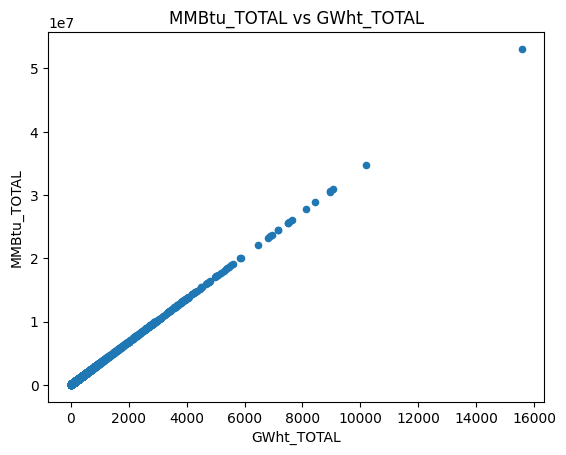

In [160]:
# visualizing the relationship between MMBtu_TOTAL and GWht_TOTAL with a scatterplot
refined_df.plot(kind='scatter', x='GWht_TOTAL', y='MMBtu_TOTAL', title='MMBtu_TOTAL vs GWht_TOTAL')
plt.show()

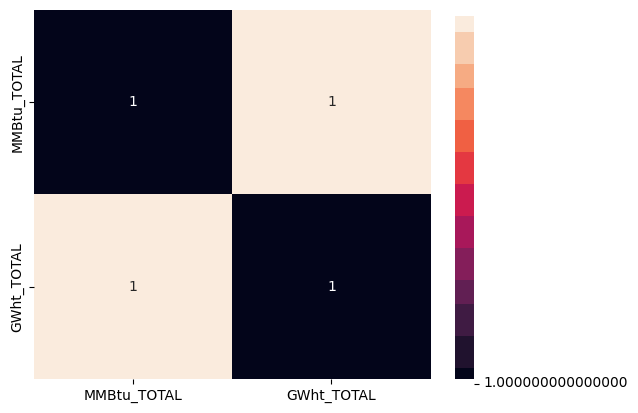

In [161]:
# determining the correlation of MMBtu_TOTAL and GWht_TOTAL
corr_df = refined_df[['MMBtu_TOTAL', 'GWht_TOTAL']].corr()

# visualizing the correlation using a heatmap
sns.heatmap(corr_df, annot=True)

plt.show()

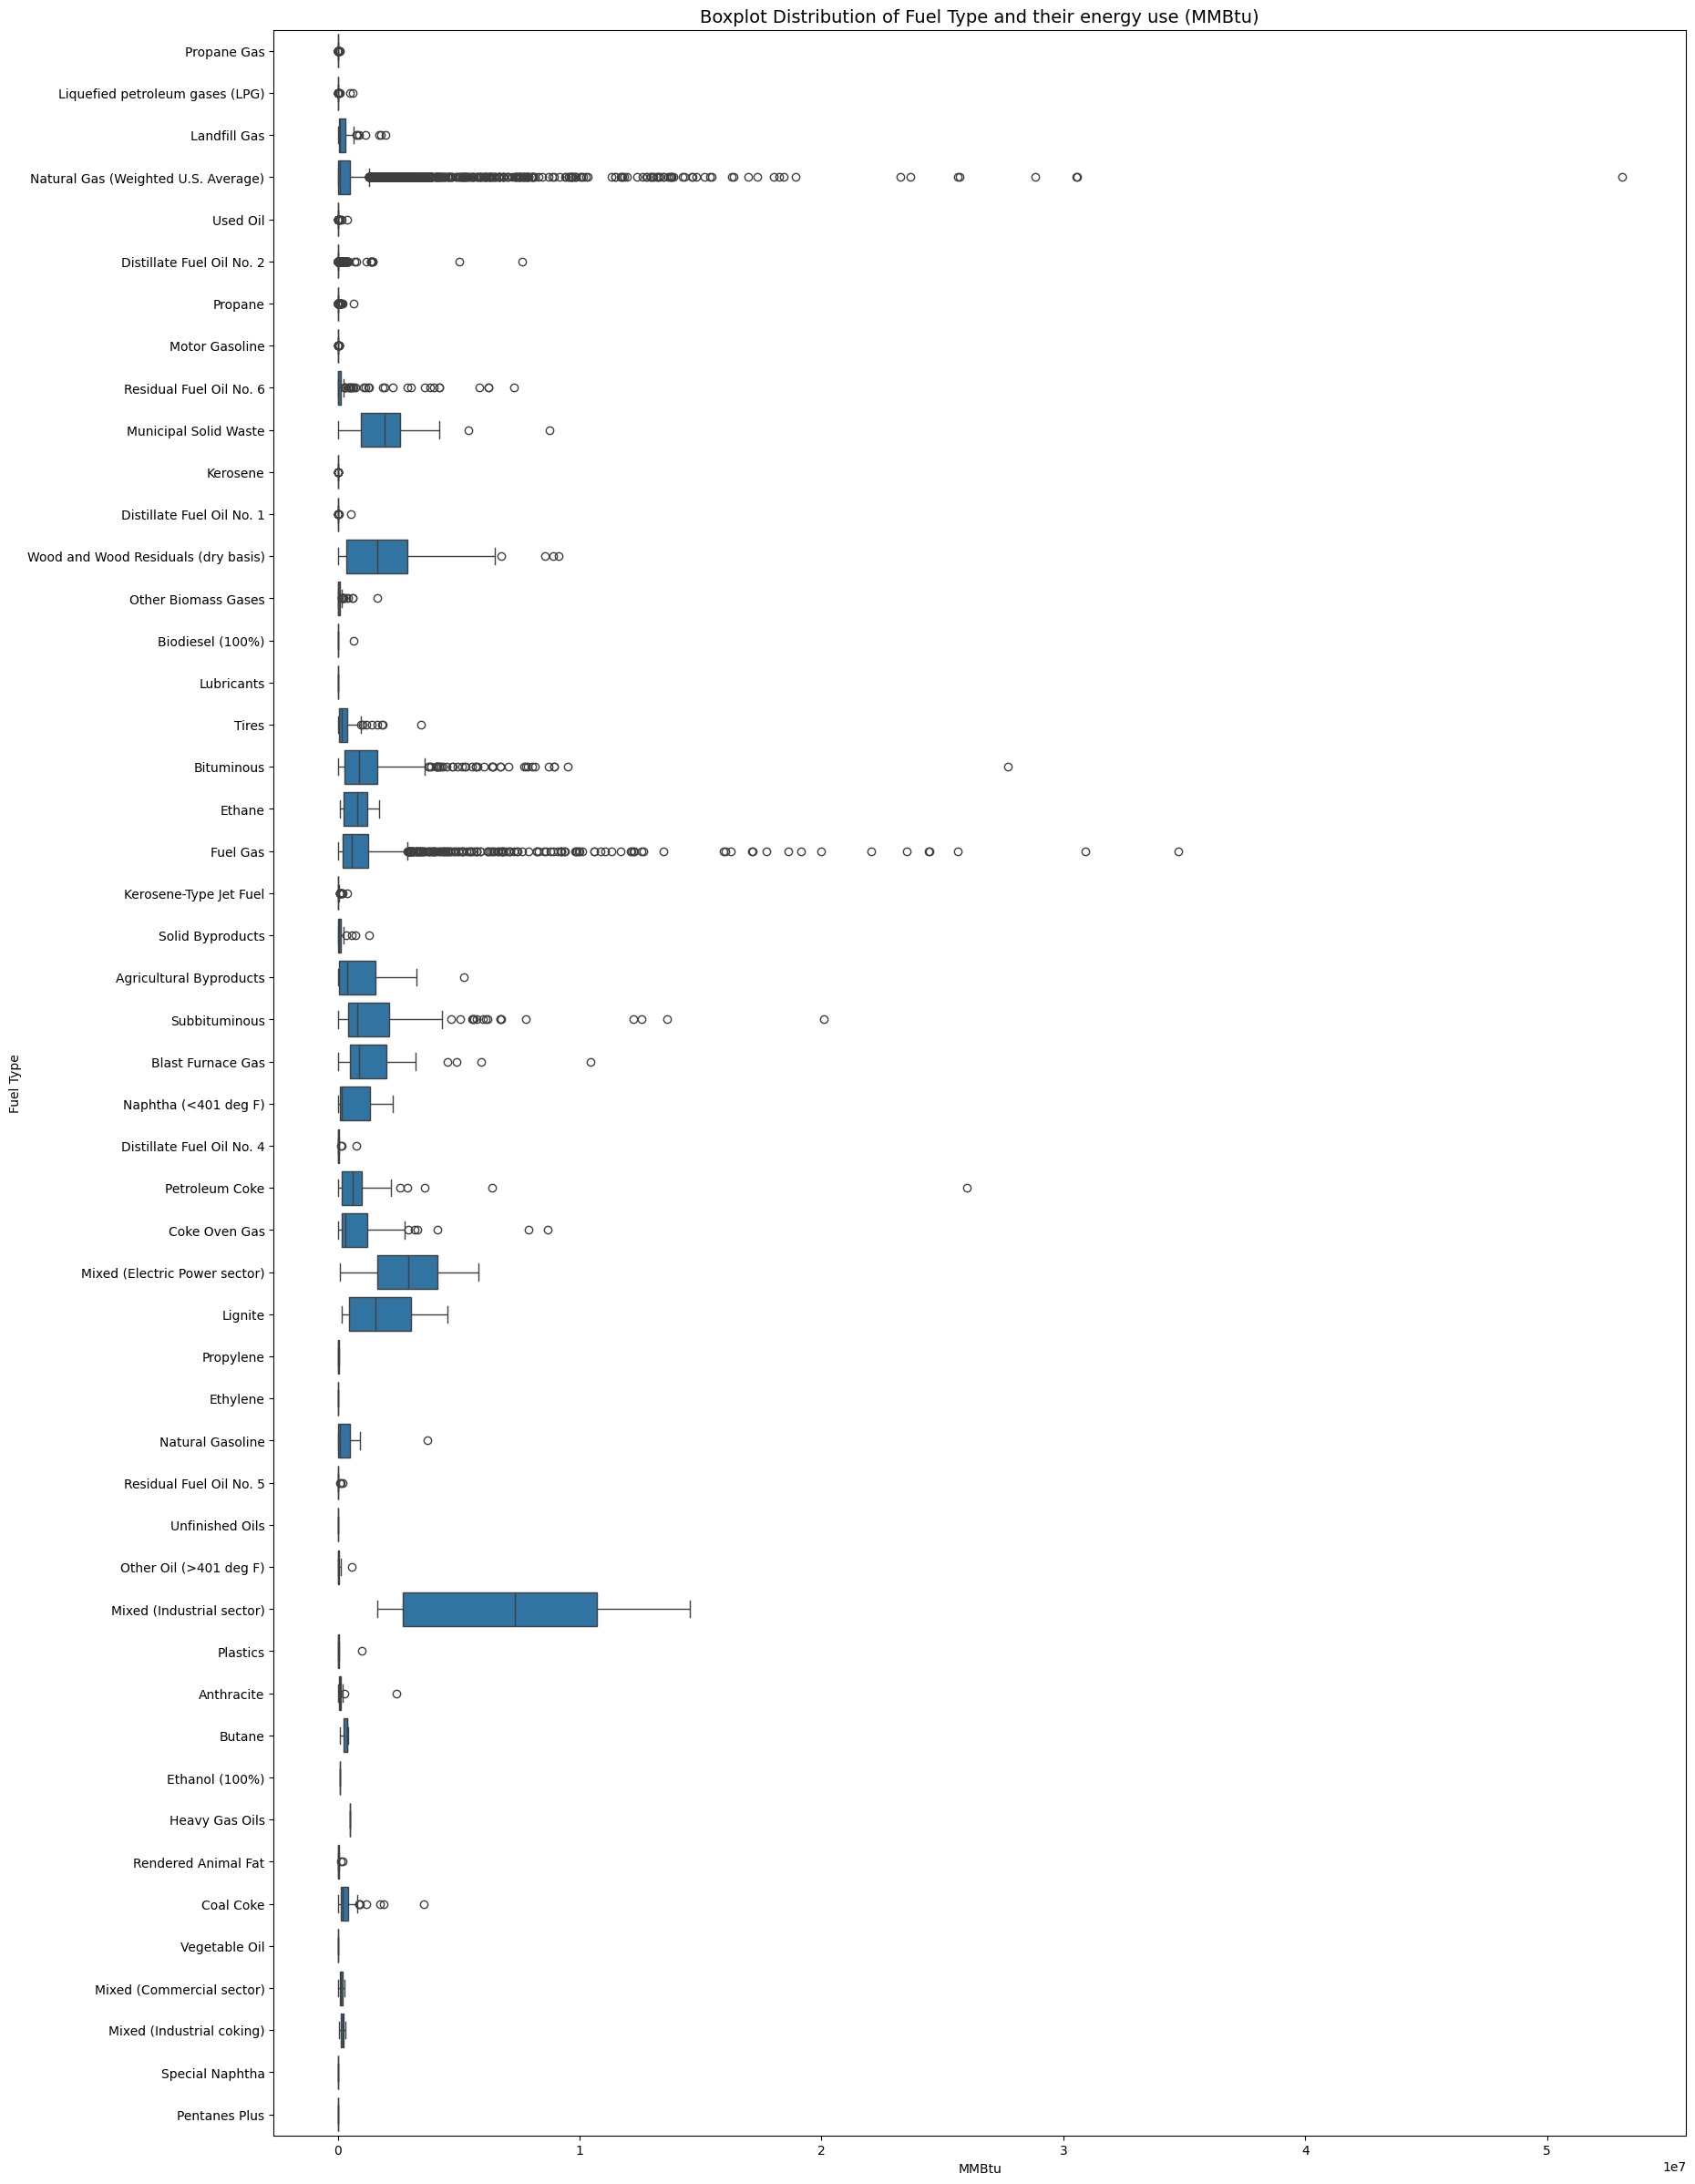

In [162]:
# visualizing of the outliers in total combustion energy usage (MMBtu) of the different fuel types across the combustion units

# specifying the plot size
plt.figure(figsize=(20, 30))

# visualizing the boxplot
sns.boxplot(y='FUEL_TYPE', x='MMBtu_TOTAL', data=refined_df)
plt.title('Boxplot Distribution of Fuel Type and their energy use (MMBtu)', fontsize=14)
plt.xlabel('MMBtu')
plt.ylabel('Fuel Type')


plt.show()

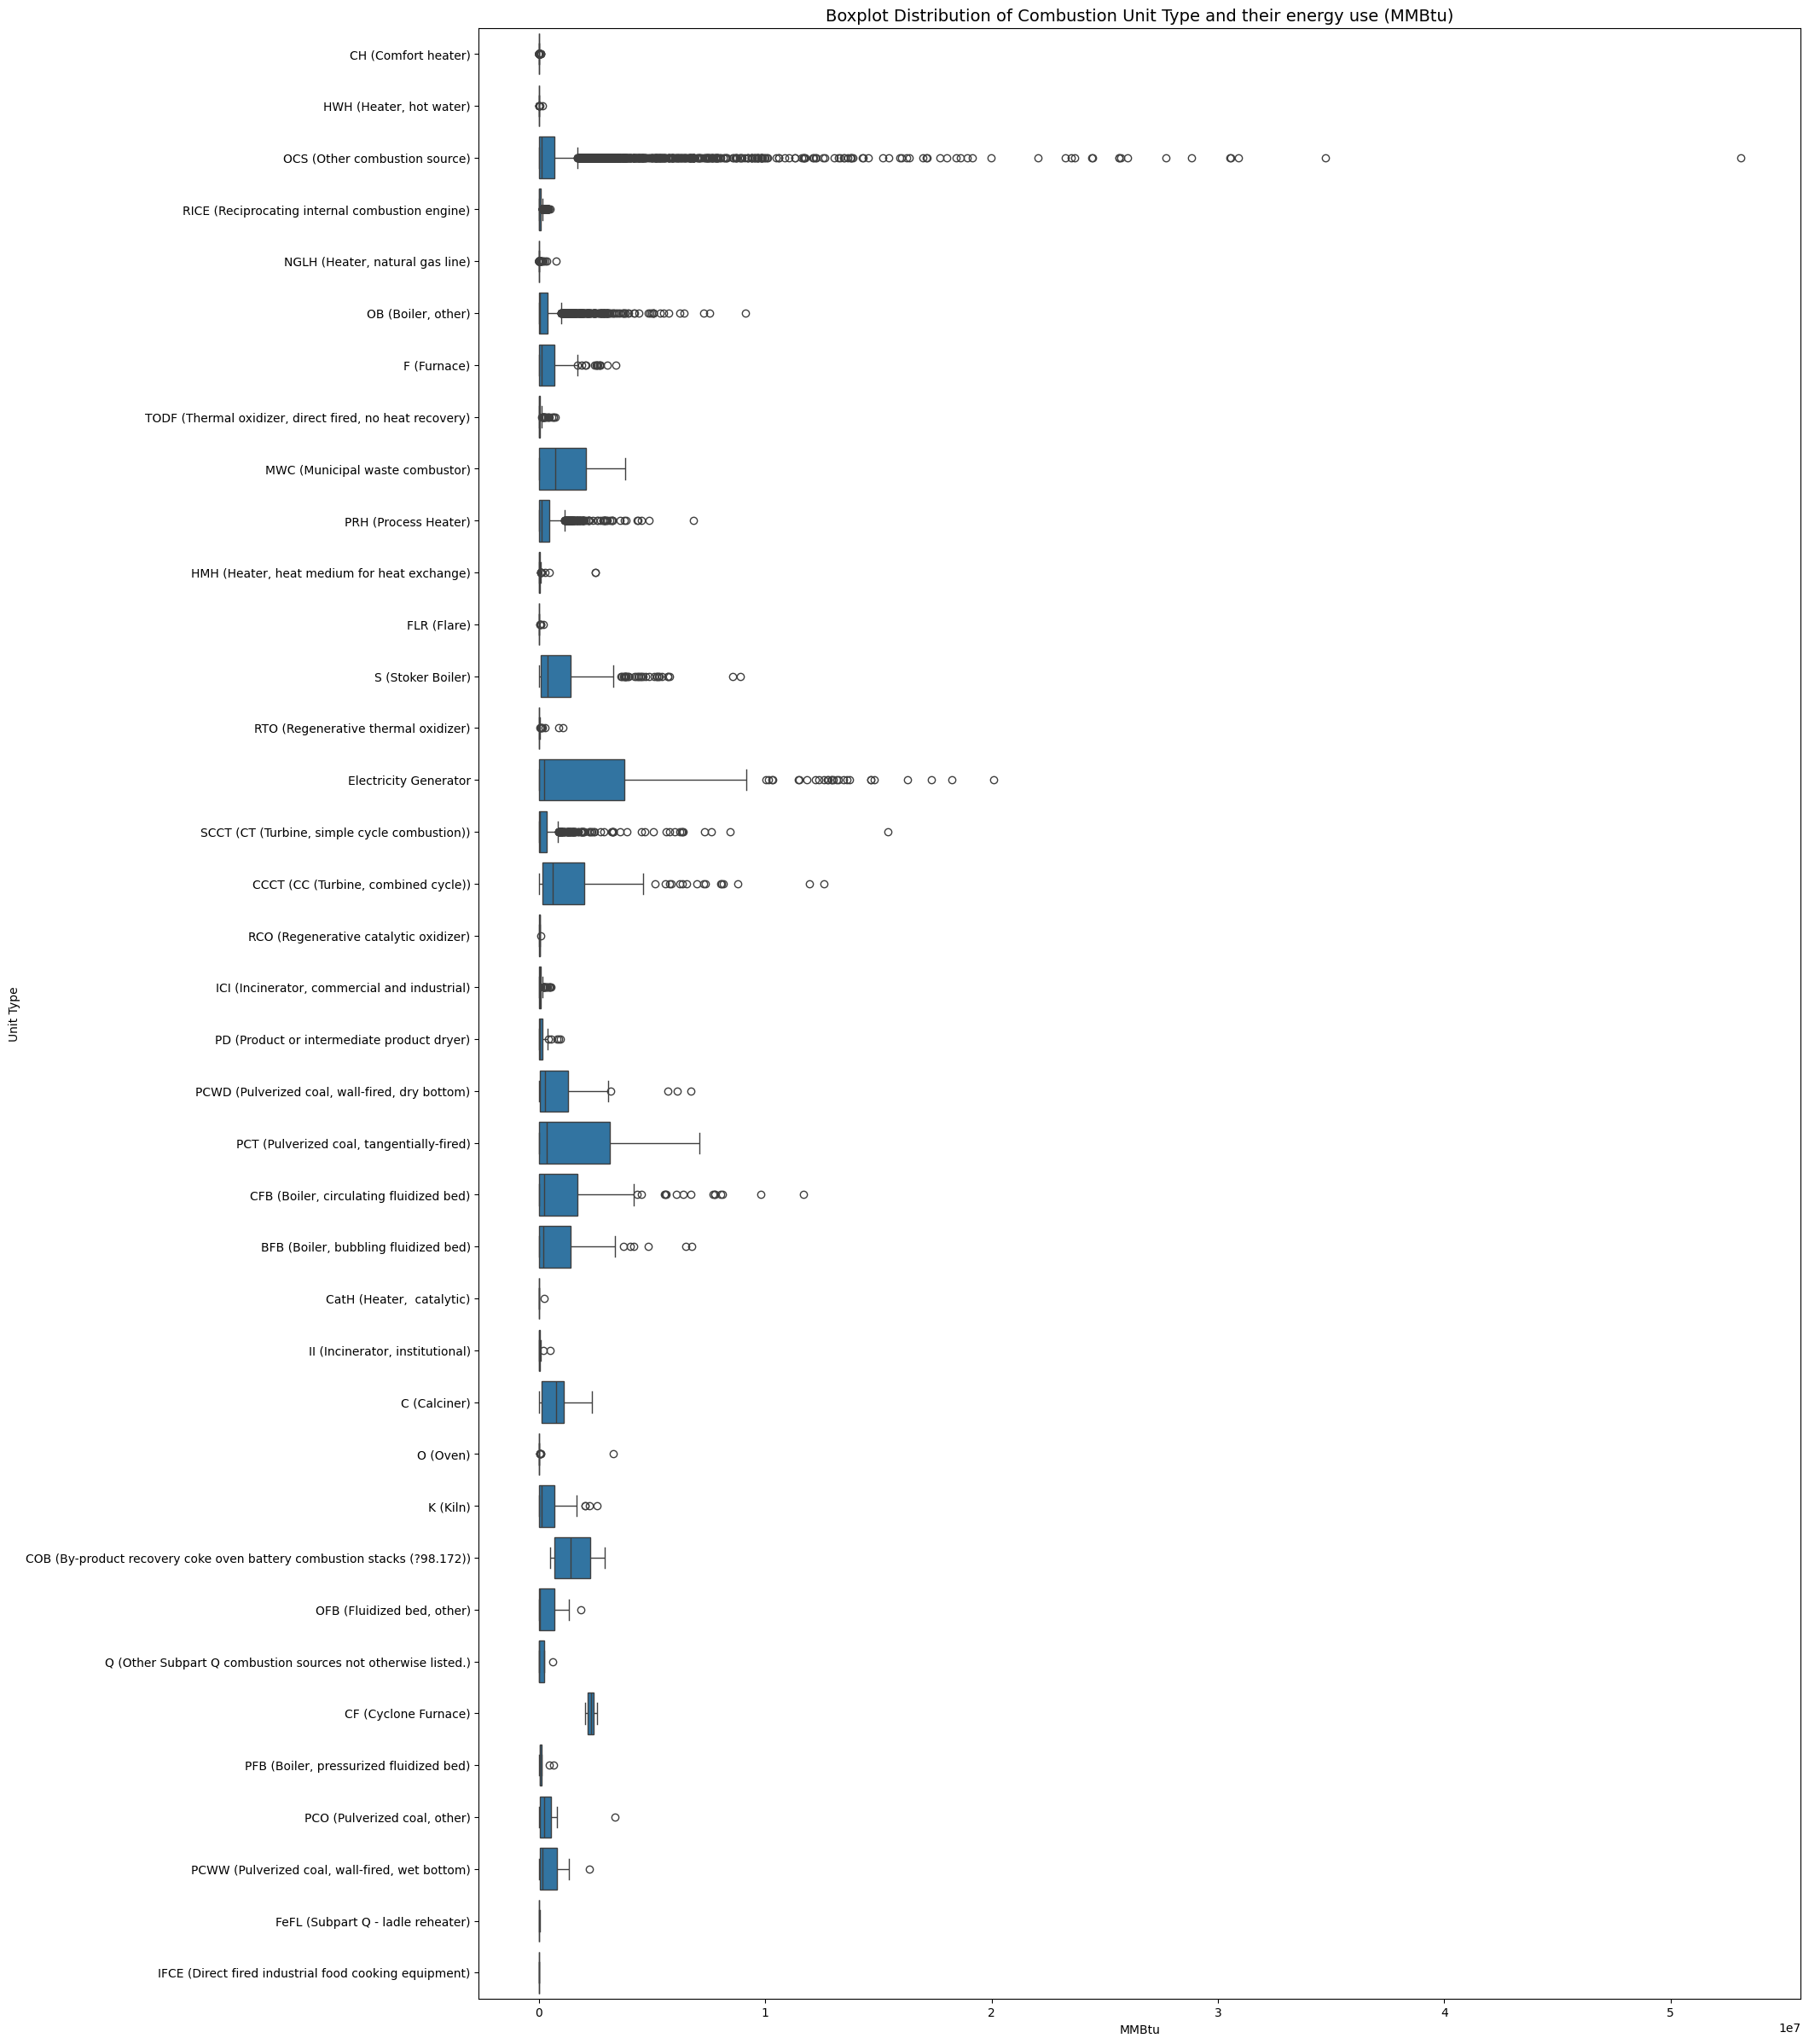

In [163]:
# visualization of the outliers in total combustion energy use (MMBtu) for the different combustion unit types

# specify the plot size
plt.figure(figsize=(20, 30))

# boxplot visualization
sns.boxplot(y='UNIT_TYPE', x='MMBtu_TOTAL', data=refined_df)
plt.title('Boxplot Distribution of Combustion Unit Type and their energy use (MMBtu)', fontsize=14)
plt.xlabel('MMBtu')
plt.ylabel('Unit Type')


plt.show()

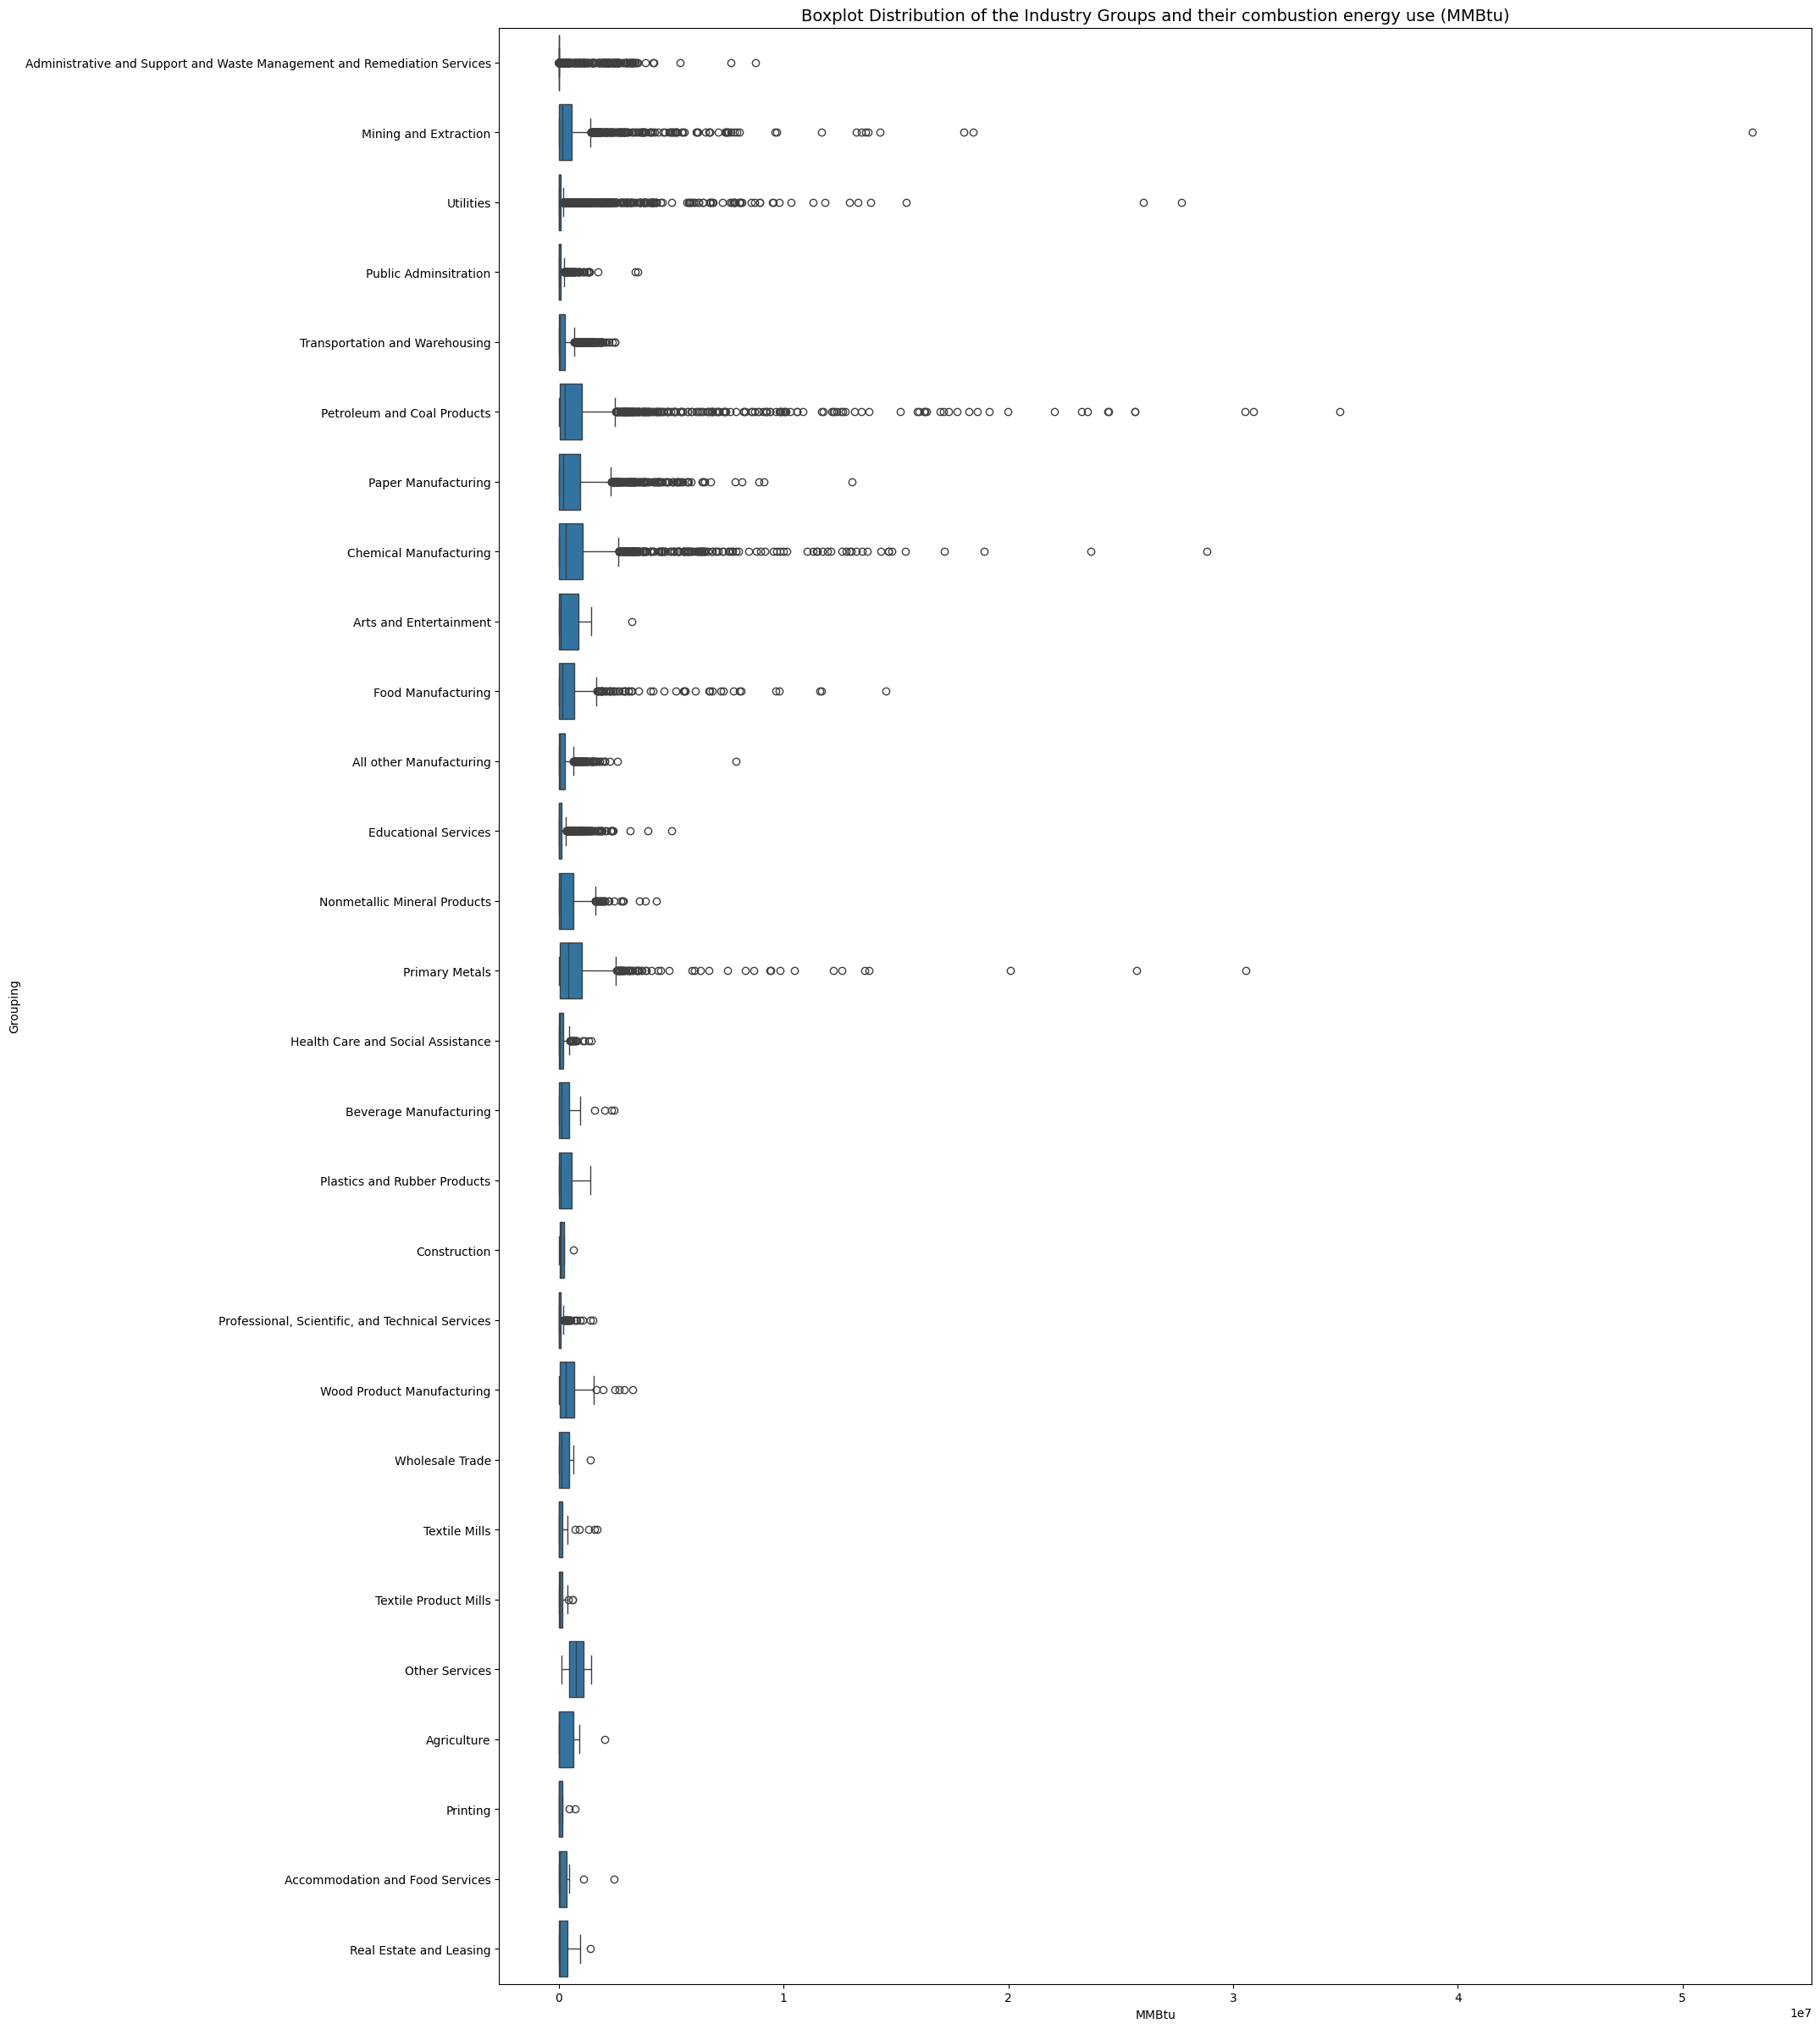

In [164]:
# visualizing the outliers in total energy use (MMBtu) for the different industry groups

# specifying the plot size
plt.figure(figsize=(20, 30))

# visualizing the boxplot
sns.boxplot(y='GROUPING', x='MMBtu_TOTAL', data=refined_df)
plt.title('Boxplot Distribution of the Industry Groups and their combustion energy use (MMBtu)', fontsize=14)
plt.xlabel('MMBtu')
plt.ylabel('Grouping')


plt.show()

### Step 5: Asking Questions About The Data

#### 1. What are the dominant fuel types used by combustion units in each MECS Region?

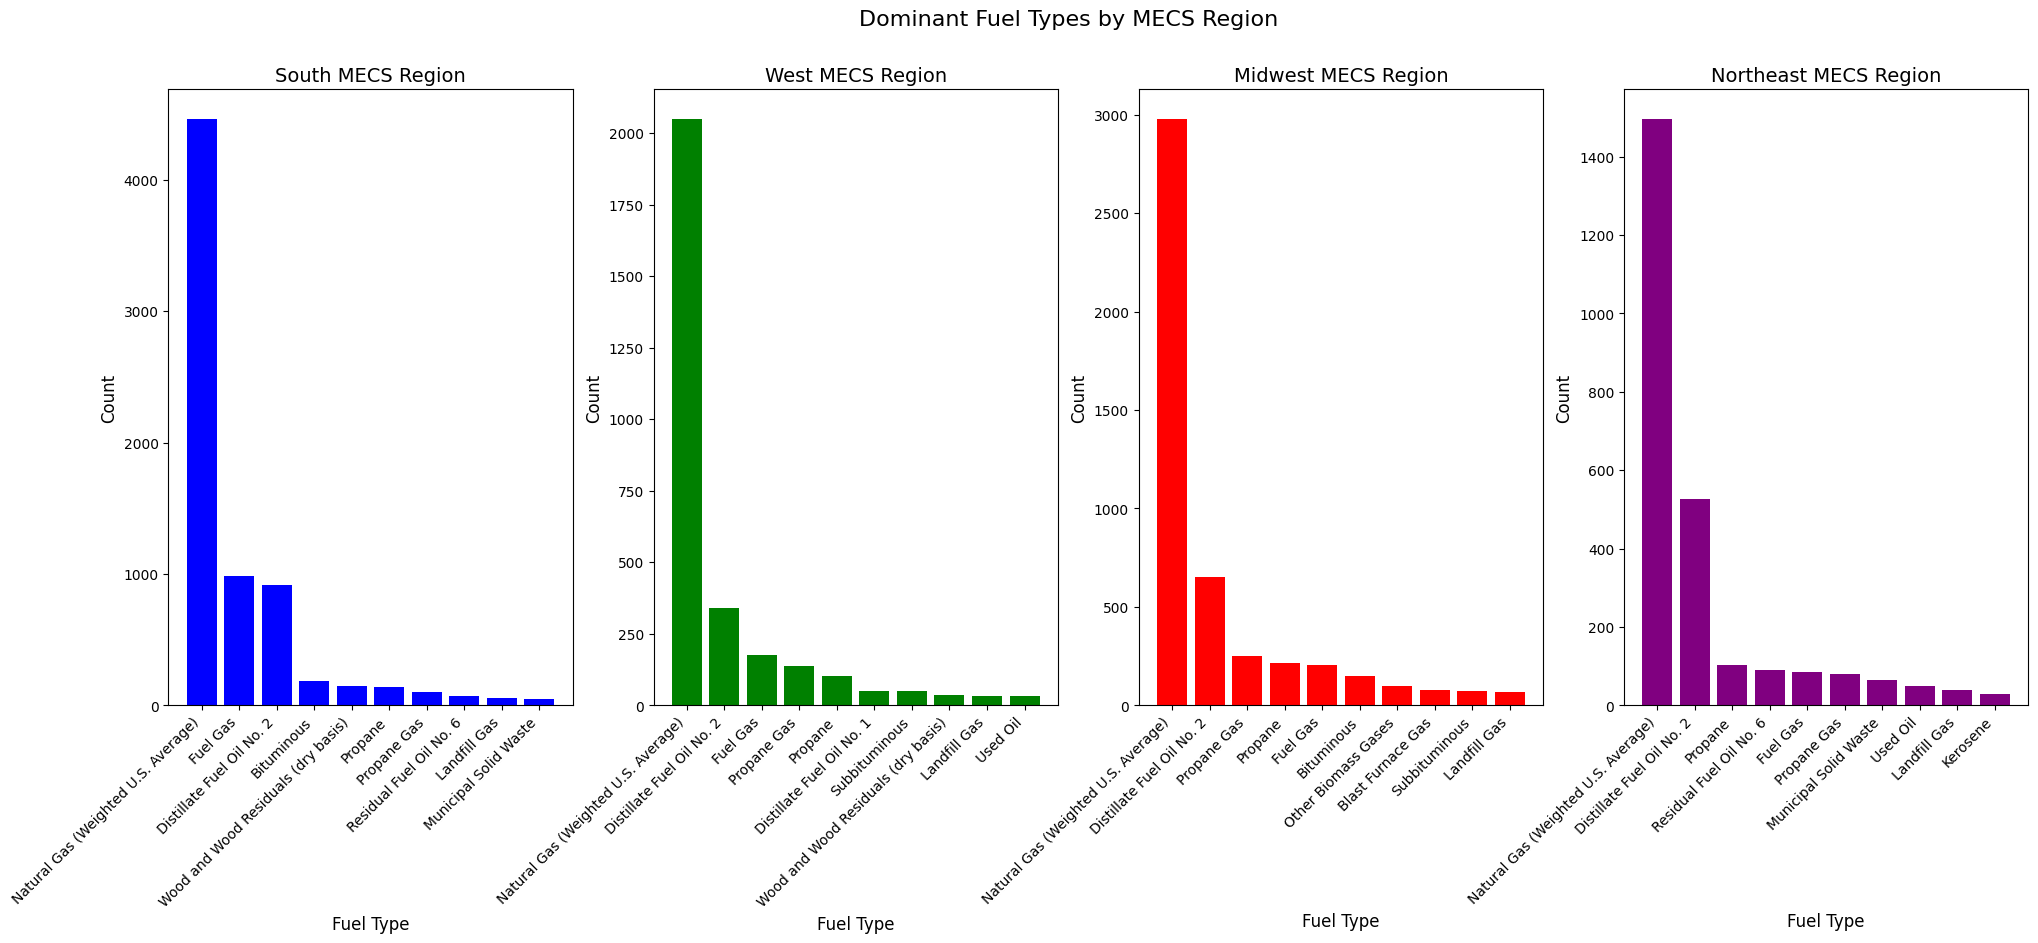

In [165]:
# grouping the South MECS region by fuel type used and selecting the top 10 fuel type used
mecs_south = refined_df.query('MECS_Region == "South"') \
            .groupby('FUEL_TYPE') \
            .size() \
            .sort_values(ascending=False) \
            .head(10)

# groupiing the West MECS region by fuel type used and selecting the top 10 fuel type used
mecs_west = refined_df.query('MECS_Region == "West"') \
            .groupby('FUEL_TYPE') \
            .size() \
            .sort_values(ascending=False) \
            .head(10)

# grouping the Midwest MECS region by fuel type used and selecting the top 10 fuel type used
mecs_midwest = refined_df.query('MECS_Region == "Midwest"') \
            .groupby('FUEL_TYPE') \
            .size() \
            .sort_values(ascending=False) \
            .head(10)

# grouping the Northeast MECS region by fuel type used and selecting the top 10 fuel type used
mecs_northeast = refined_df.query('MECS_Region == "Northeast"') \
            .groupby('FUEL_TYPE') \
            .size() \
            .sort_values(ascending=False) \
            .head(10)

# extracting the fuel types and their corresponding counts from mecs_south
x_south, y_south = mecs_south.index, mecs_south.values

# extracting the fuel types and their corresponding counts from mecs_south
x_west, y_west = mecs_west.index, mecs_west.values

# extracting the fuel types and their corresponding counts from mecs_midwest
x_midwest, y_midwest = mecs_midwest.index, mecs_midwest.values

# extracting the fuel types and their corresponding counts from mecs_northeast
x_northeast, y_northeast = mecs_northeast.index, mecs_northeast.values

# specifying the subplots parameters
no_of_subplots = 4
rows = 1
cols = 4

# specifying the spacing between subplots
plt.figure(figsize=(24 * rows, 2 * np.ceil(no_of_subplots/rows)))

# subplot 1: for South MECS Region
plt.subplot(rows, cols, 1)
plt.bar(x_south, y_south, color='blue')
plt.title('South MECS Region', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')


# subplot 2: for West MECS Region
plt.subplot(rows, cols, 2)
plt.bar(x_west, y_west, color='green')
plt.title('West MECS Region', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# subplot 3: for Midwest MECS Region
plt.subplot(rows, cols, 3)
plt.bar(x_midwest, y_midwest, color='red')
plt.title('Midwest MECS Region', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# subplot 3: for Northeast MECS Region
plt.subplot(rows, cols, 4)
plt.bar(x_northeast, y_northeast, color='purple')
plt.title('Northeast MECS Region', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# adding a main title to the subplots
plt.suptitle('Dominant Fuel Types by MECS Region', fontsize=16)

plt.show()

#### 2. Which industrial facilities have the highest combustion energy use?

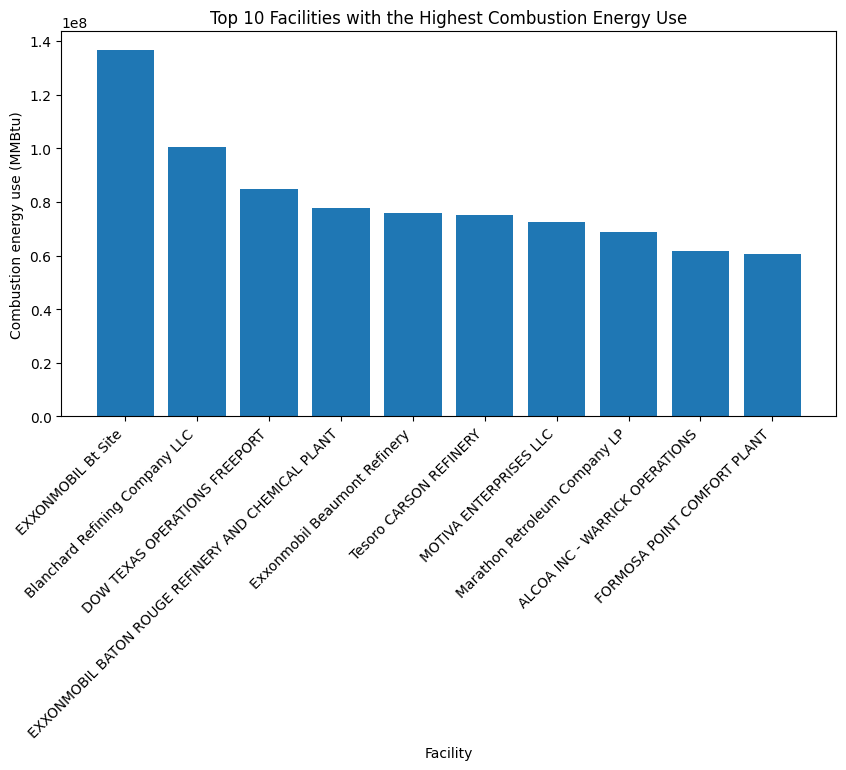

In [166]:
# extracting the facilities having the most combustion energy use - top 10
top_10_fty_comb_dmd = refined_df.groupby('FACILITY_NAME')['MMBtu_TOTAL'].sum().sort_values(ascending=False).head(10)


# extracting the top 10 facilities and their corresponding combustion energy use
x, y = top_10_fty_comb_dmd.index, top_10_fty_comb_dmd.values

# specifying the spacing around the plot
plt.figure(figsize=(10, 5))

# plotting the distribution
plt.bar(x, y)
plt.title('Top 10 Facilities with the Highest Combustion Energy Use')
plt.xlabel('Facility')
plt.ylabel('Combustion energy use (MMBtu)')
plt.xticks(rotation=45, ha='right') 


plt.show()

#### 3. Which industrial facilities have the most combustion units? What kind of combustion units can be found in such facilities?

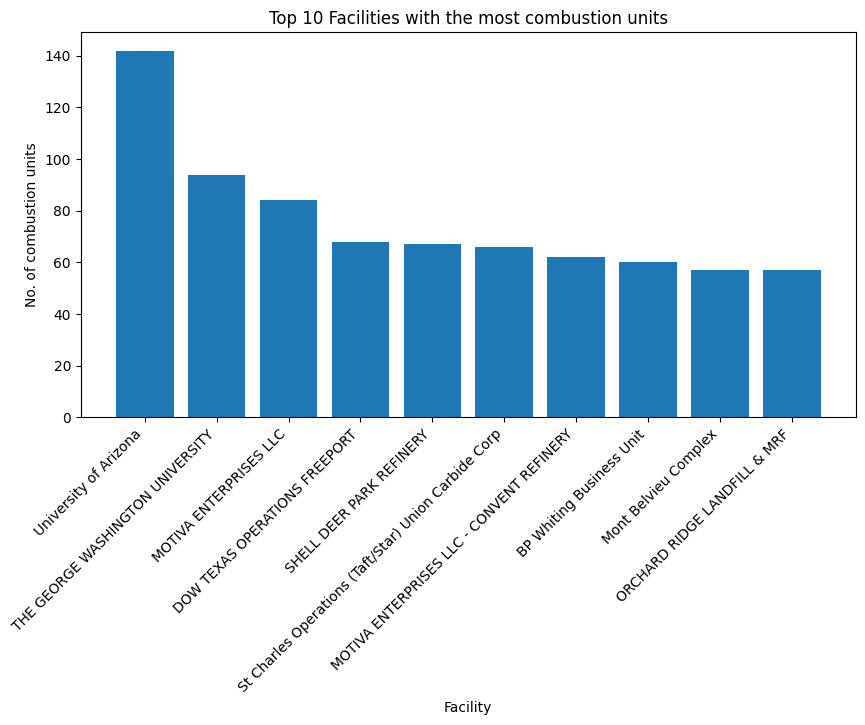

In [167]:
# extracting the facilities having the most combustion units - top 10
top_10_fty = refined_df['FACILITY_NAME'].value_counts().sort_values(ascending=False).head(10)


# extracting the top 10 facilities and their corresponding no. of combustion units
x, y = top_10_fty.index, top_10_fty.values

# specifying the spacing around the plot
plt.figure(figsize=(10, 5))

# plotting the distribution
plt.bar(x, y)
plt.title('Top 10 Facilities with the most combustion units')
plt.xlabel('Facility')
plt.ylabel('No. of combustion units')
plt.xticks(rotation=45, ha='right') 


plt.show()

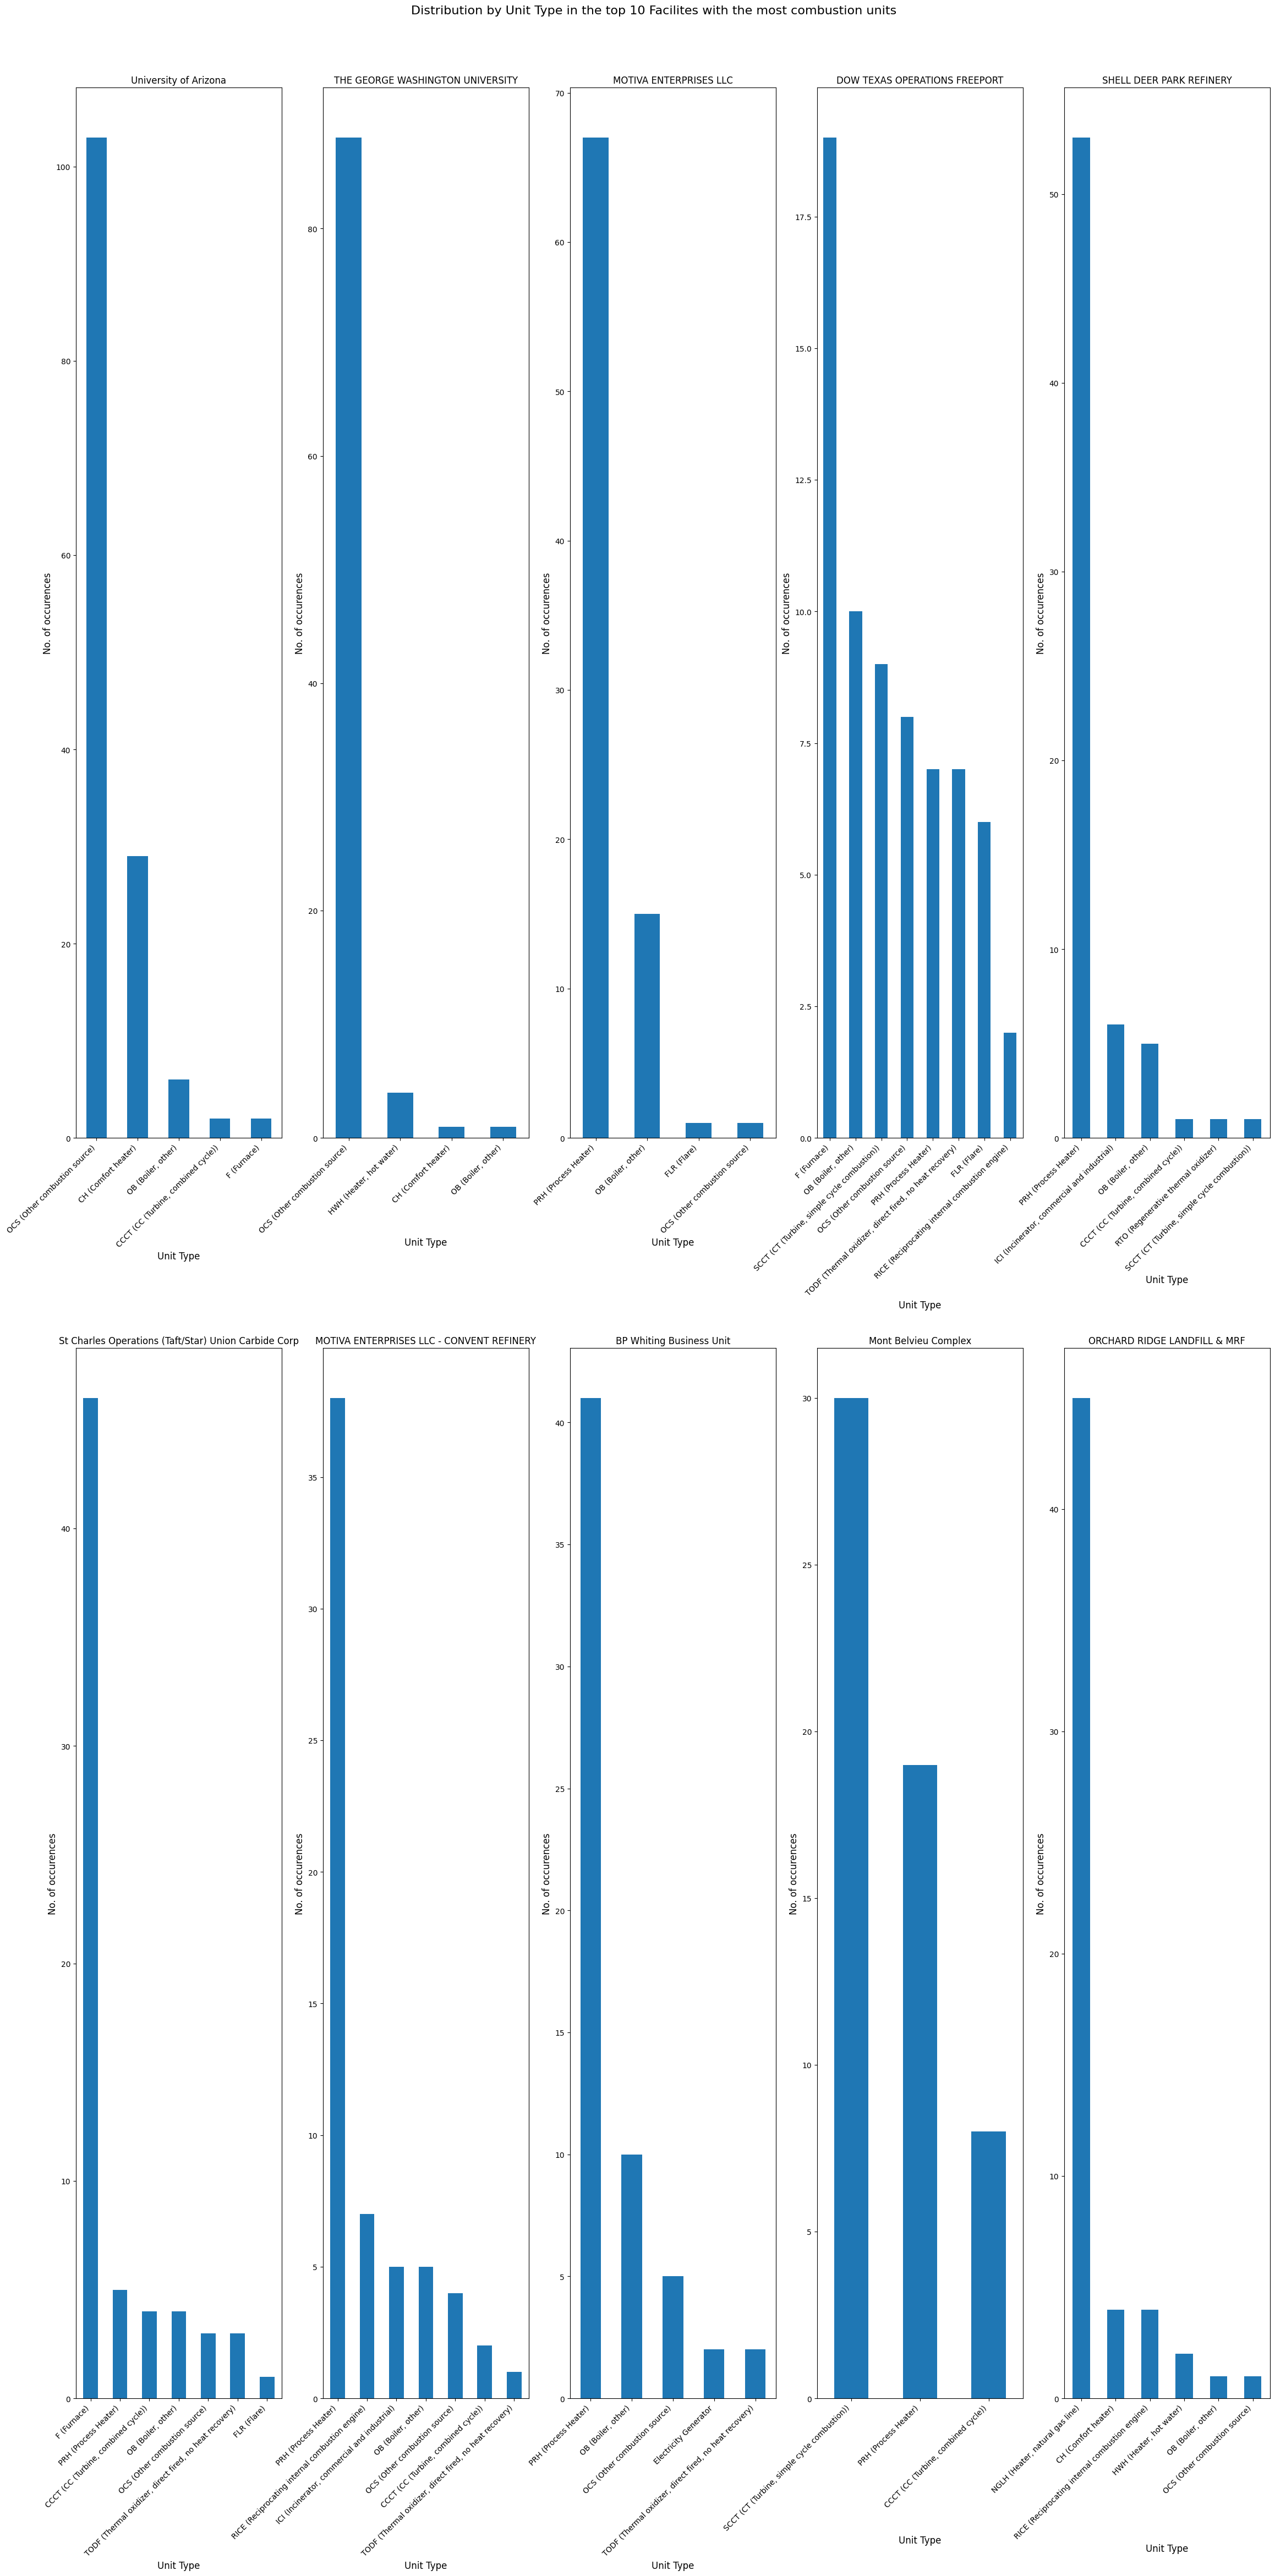

In [168]:
# making a copy of the cleaned dataset for aggregation
copy_df_1 = refined_df.copy()

# extracting an array of the top 10 facilities by number of units owned
top_10_fcty_col = copy_df_1.groupby('FACILITY_NAME')['UNIT_NAME'].size().sort_values(ascending=False).head(10).reset_index().drop('UNIT_NAME', axis=1)

# grouping the facilities by unit type
unit_group = copy_df_1.groupby('FACILITY_NAME')['UNIT_TYPE'].value_counts()


# specifying the subplots parameters
no_of_subplots = 10
rows = 2
cols = 5


# specifying the spacing between subplots
plt.figure(figsize=(14 * rows, 10 * np.ceil(no_of_subplots/rows)))


# looping through the array of extracted facilities and plotting the distribution of combustion unit type for each of them
for i in range(len(top_10_fcty_col)):
    fcty_name = top_10_fcty_col.iloc[i]['FACILITY_NAME']

    plt.subplot(rows,cols,i+1)
    unit_group[fcty_name].plot(kind="bar")
    plt.title(fcty_name, fontsize=12)
    plt.xlabel('Unit Type', fontsize=12)
    plt.ylabel('No. of occurences', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    


# adding a main title to the subplots and adjust the spacing between the main title and subplots
plt.suptitle('Distribution by Unit Type in the top 10 Facilites with the most combustion units', fontsize=16)
plt.subplots_adjust(top=0.95)


plt.show()

#### 4. What are the values of average and total combustion energy consumption per MECS Region?

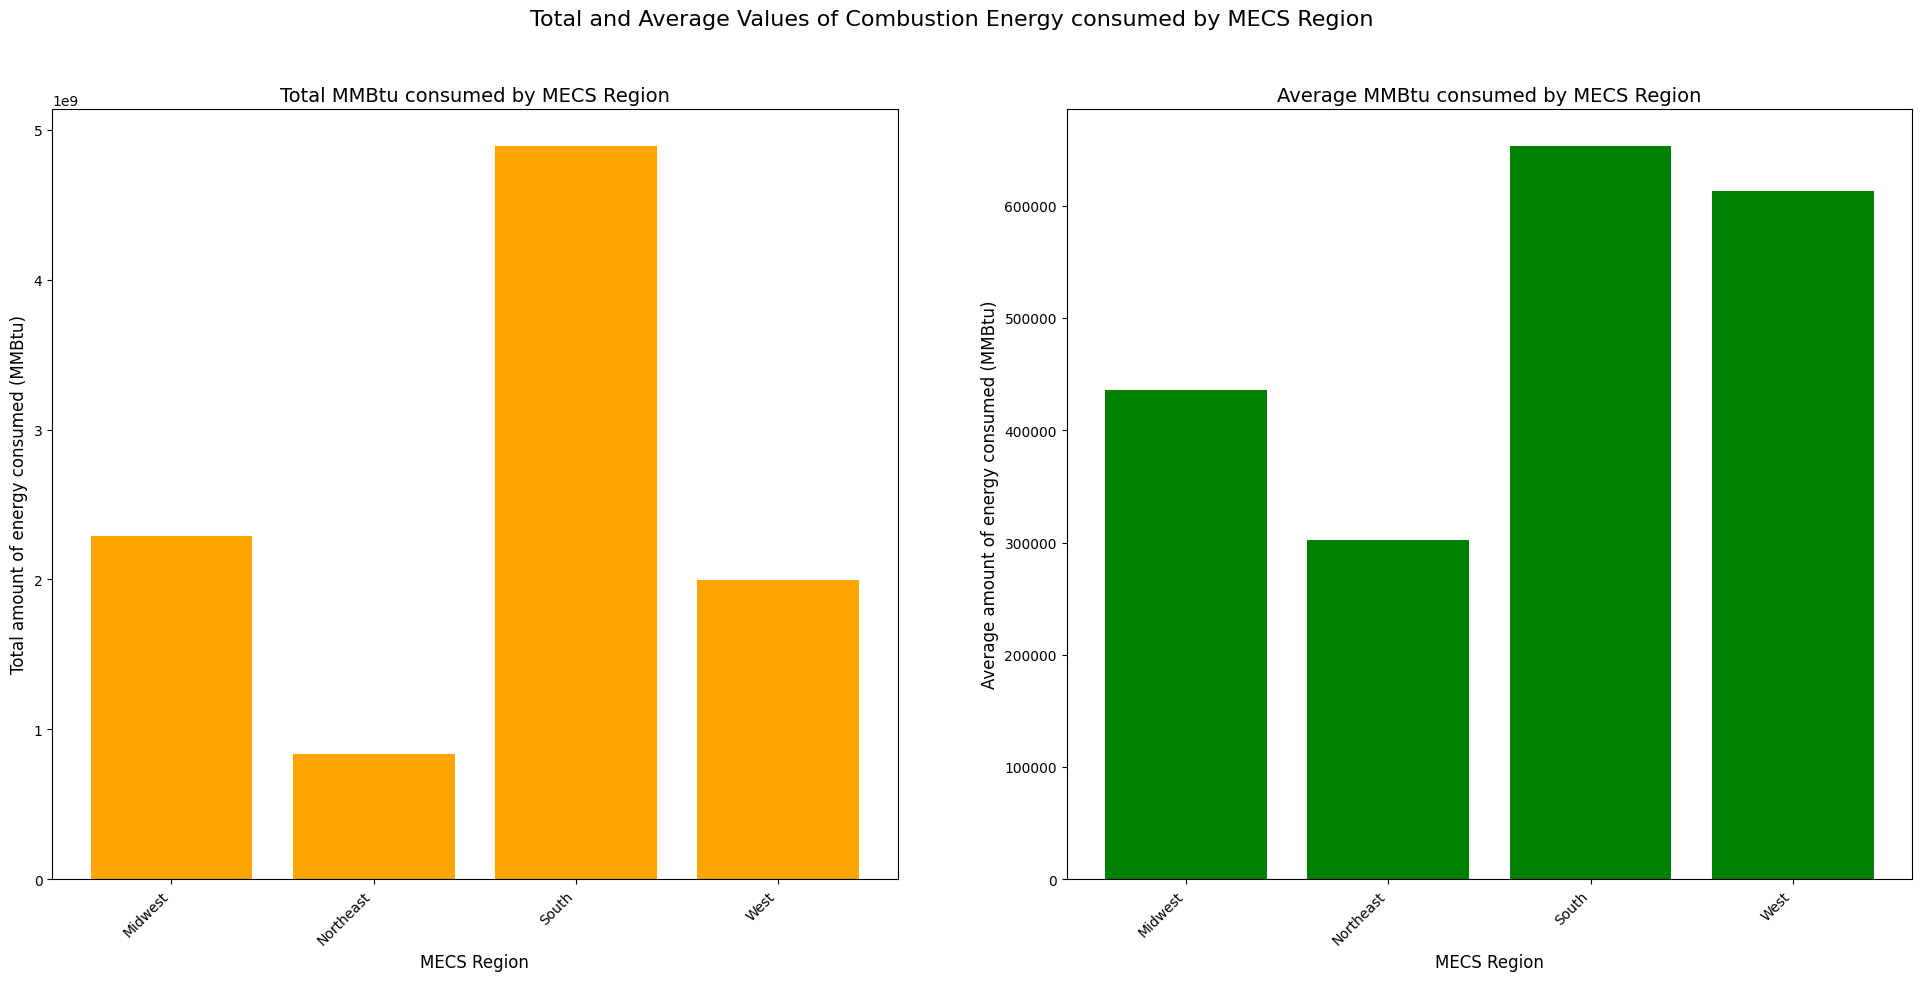

In [169]:
# extracting MMBtu_TOTAL values by MECS_Region and calculating the sum for each region
tot_energy_mecs = refined_df.groupby('MECS_Region')[['MMBtu_TOTAL']].sum()

# extracting MMBtu_TOTAL values by MECS_Region and calculating the average for each region
avg_energy_mecs = refined_df.groupby('MECS_Region')[['MMBtu_TOTAL']].mean()


# extracting the MECS regions and their corresponding total energy consumed
x_tot_mecs, y_tot_mecs = tot_energy_mecs.index, tot_energy_mecs.values

# extracting the MECS regions and their corresponding average energy consumed
x_avg_mecs, y_avg_mecs = avg_energy_mecs.index, avg_energy_mecs.values

# converting 2-D array to 1-D array to allow for plotting
y_tot_mecs_conv, y_avg_mecs_conv = y_tot_mecs.flatten(), y_avg_mecs.flatten()


# specifying the subplots parameters
no_of_subplots = 2
rows = 1
cols = 2

# specifying the spacing between subplots
plt.figure(figsize=(24 * rows, 5 * np.ceil(no_of_subplots/rows)))

# subplot 1: for total combustion energy values per MECS Region
plt.subplot(rows, cols, 1)
plt.bar(x_tot_mecs, y_tot_mecs_conv, color='orange')
plt.title('Total MMBtu consumed by MECS Region', fontsize=14)
plt.xlabel('MECS Region', fontsize=12)
plt.ylabel('Total amount of energy consumed (MMBtu)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# subplot 2: for average combustion energy values per MECS Region
plt.subplot(rows, cols, 2)
plt.bar(x_avg_mecs, y_avg_mecs_conv, color='green')
plt.title('Average MMBtu consumed by MECS Region', fontsize=14)
plt.xlabel('MECS Region', fontsize=12)
plt.ylabel('Average amount of energy consumed (MMBtu)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# adding a main title to the subplots
plt.suptitle('Total and Average Values of Combustion Energy consumed by MECS Region', fontsize=16)

plt.show()    

#### 5. What are the values of average and total combustion energy consumption per State?

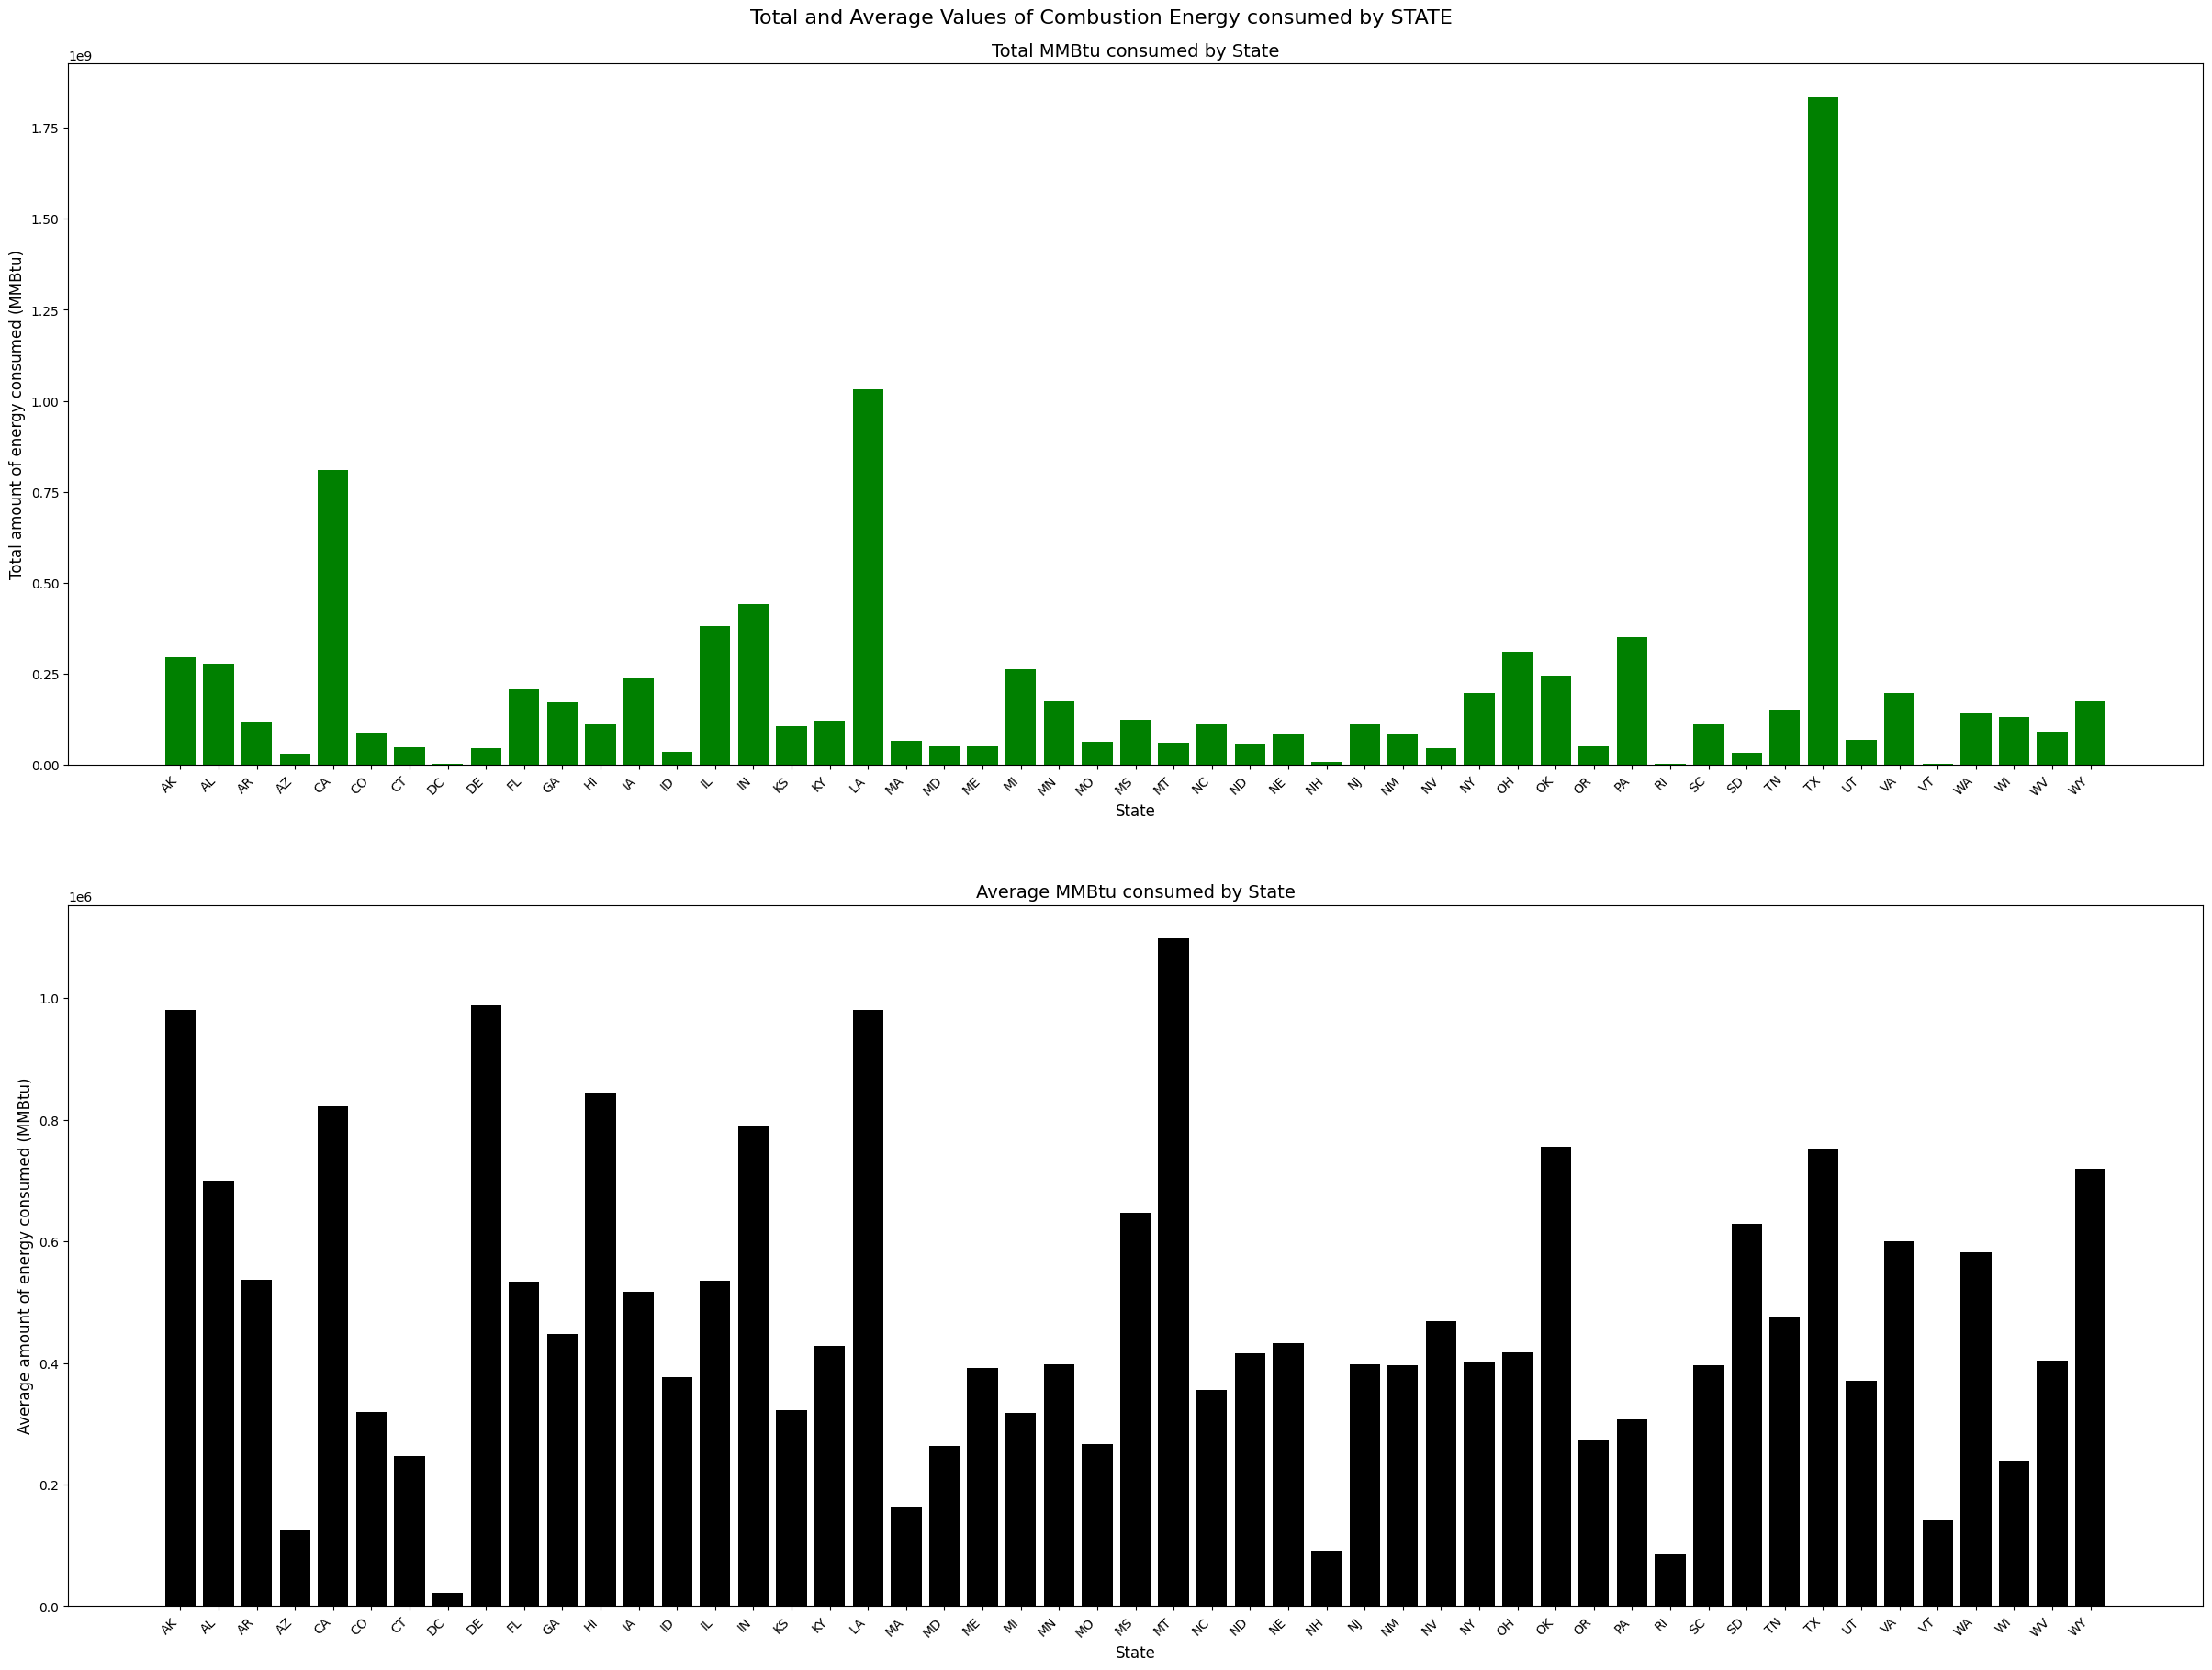

In [170]:
# extracting MMBtu_TOTAL values by STATE and calculating the sum for each state
tot_energy_state = refined_df.groupby('STATE')['MMBtu_TOTAL'].sum()

# extracting MMBtu_TOTAL values by STATE and calculating the average for each state
avg_energy_state = refined_df.groupby('STATE')['MMBtu_TOTAL'].mean()


# extracting the MECS regions and their corresponding total energy consumed
x_tot_state, y_tot_state = tot_energy_state.index, tot_energy_state.values

# extracting the MECS regions and their corresponding average energy consumed
x_avg_state, y_avg_state = avg_energy_state.index, avg_energy_state.values

# converting 2-D array to 1-D array to allow for plotting
y_tot_state_conv, y_avg_state_conv = y_tot_state.flatten(), y_avg_state.flatten()



# specifying the subplots parameters
no_of_subplots = 2
rows = 2
cols = 1

# specifying the spacing between subplots
plt.figure(figsize=(15 * rows, 20 * np.ceil(no_of_subplots/rows)))

# subplot 1: for total combustion energy values per STATE
plt.subplot(rows, cols, 1)
plt.bar(x_tot_state, y_tot_state_conv, color='green')
plt.title('Total MMBtu consumed by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total amount of energy consumed (MMBtu)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# subplot 2: for average combustion energy values per STATE
plt.subplot(rows, cols, 2)
plt.bar(x_avg_state, y_avg_state_conv, color='black')
plt.title('Average MMBtu consumed by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average amount of energy consumed (MMBtu)', fontsize=12)
plt.xticks(rotation=45, ha='right')


# adding a main title to the subplots and adjust the spacing between the main title and subplots
plt.suptitle('Total and Average Values of Combustion Energy consumed by STATE', fontsize=16)
plt.subplots_adjust(top=0.95)

plt.show()

#### 6. What Industries are the major contributors to combustion energy consumption based on the North American Industry Classification System (NAICS)?

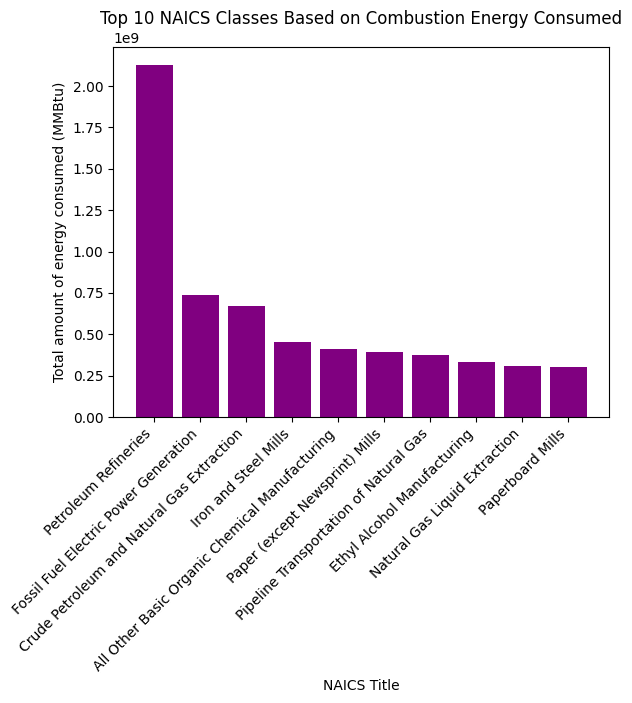

In [171]:
# extracting MMBtu_TOTAL values by PRIMARY_NAICS_TITLE and calculating the sum for each class and select the top 10 classes with the highest counts
tot_energy_naics = refined_df.groupby('PRIMARY_NAICS_TITLE')[['MMBtu_TOTAL']].sum().sort_values(by='MMBtu_TOTAL', ascending=False).head(10)

# extracting the NAICS classes and their corresponding total energy consumed
x_tot_naics, y_tot_naics = tot_energy_naics.index, tot_energy_naics.values

# converting 2-D array to 1-D array to allow for plotting
y_tot_naics_conv = y_tot_naics.flatten()

# plotting the distribution
plt.bar(x_tot_naics, y_tot_naics_conv, color='purple')
plt.title('Top 10 NAICS Classes Based on Combustion Energy Consumed')
plt.xlabel('NAICS Title')
plt.ylabel('Total amount of energy consumed (MMBtu)')
plt.xticks(rotation=45, ha='right')

plt.show()

#### 7. What Industry Groups are the major contributors to combustion energy consumption?

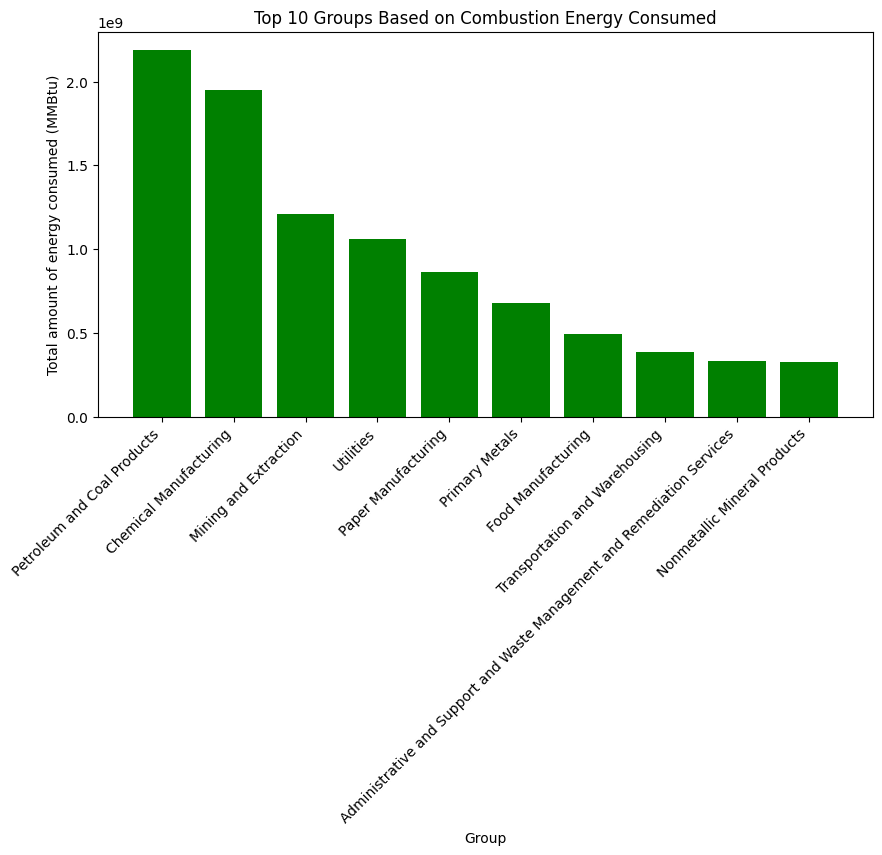

In [172]:
# extracting MMBtu_TOTAL values by GROUPING and calculating the sum for each group and select the top 10 group with the highest counts
tot_energy_grp = refined_df.groupby('GROUPING')[['MMBtu_TOTAL']].sum().sort_values(by='MMBtu_TOTAL', ascending=False).head(10)

# extracting the groups and their corresponding total energy consumed
x_tot_grp, y_tot_grp = tot_energy_grp.index, tot_energy_grp.values

# converting 2-D array to 1-D array to allow for plotting
y_tot_grp_conv = y_tot_grp.flatten()

# specifying the spacing around the plot
plt.figure(figsize=(10, 5))

# plotting the distribution
plt.bar(x_tot_grp, y_tot_grp_conv, color='green')
plt.title('Top 10 Groups Based on Combustion Energy Consumed')
plt.xlabel('Group')
plt.ylabel('Total amount of energy consumed (MMBtu)')
plt.xticks(rotation=45, ha='right')

plt.show()

#### 8. Across industry groups, what is the distribution of combustion units for cogeneration versus non-cogeneration use?

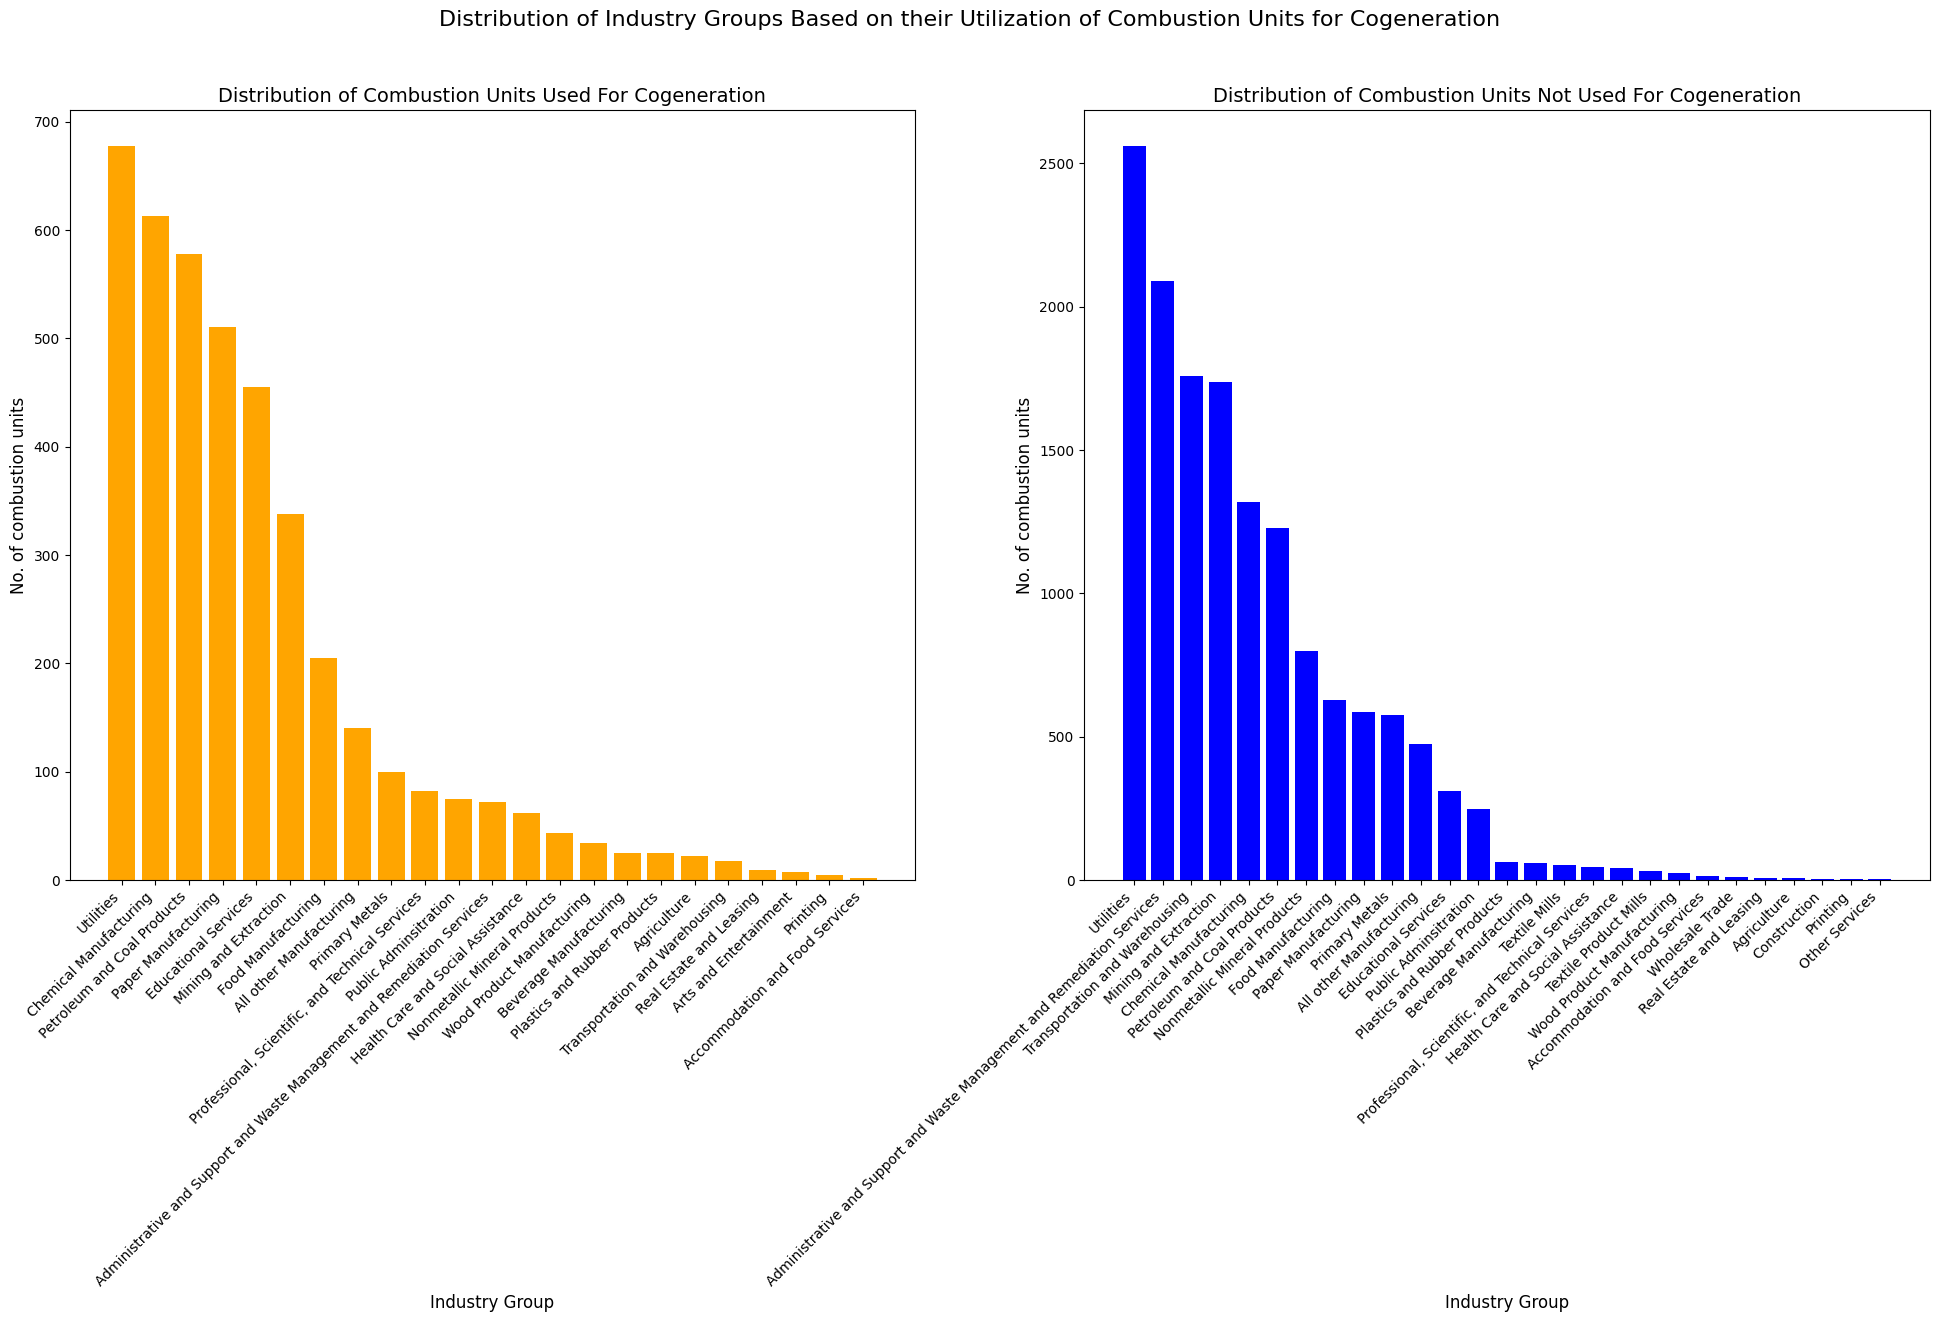

In [173]:
# extracting MMBtu_TOTAL values by COGENERATION_UNIT_EMISS_IND and calculating the sum for each group
cogen_grp_yes = refined_df.groupby('COGENERATION_UNIT_EMISS_IND')['GROUPING'].value_counts()['Yes']
cogen_grp_no = refined_df.groupby('COGENERATION_UNIT_EMISS_IND')['GROUPING'].value_counts()['No']

# extracting the groups and their corresponding counts
x_cogen_grp_yes, y_cogen_grp_yes = cogen_grp_yes.index, cogen_grp_yes.values

# extracting the groups and their corresponding counts
x_cogen_grp_no, y_cogen_grp_no = cogen_grp_no.index, cogen_grp_no.values

# specifying the subplots parameters
no_of_subplots = 2
rows = 1
cols = 2

# specifying the spacing between subplots
plt.figure(figsize=(24 * rows, 5 * np.ceil(no_of_subplots/rows)))

# subplot 1: for total combustion energy values per MECS Region
plt.subplot(rows, cols, 1)
plt.bar(x_cogen_grp_yes, y_cogen_grp_yes, color='orange')
plt.title('Distribution of Combustion Units Used For Cogeneration', fontsize=14)
plt.xlabel('Industry Group', fontsize=12)
plt.ylabel('No. of combustion units', fontsize=12)
plt.xticks(rotation=45, ha='right')

# subplot 2: for average combustion energy values per MECS Region
plt.subplot(rows, cols, 2)
plt.bar(x_cogen_grp_no, y_cogen_grp_no, color='blue')
plt.title('Distribution of Combustion Units Not Used For Cogeneration', fontsize=14)
plt.xlabel('Industry Group', fontsize=12)
plt.ylabel('No. of combustion units', fontsize=12)
plt.xticks(rotation=45, ha='right')

# adding a main title to the subplots
plt.suptitle('Distribution of Industry Groups Based on their Utilization of Combustion Units for Cogeneration', fontsize=16)

plt.show()